# Chapter 4: Training Models
# Hands-On Machine Learning - Reproduksi dan Penjelasan

"""
CHAPTER 4: TRAINING MODELS

Pada bab ini, kita akan mempelajari cara kerja internal dari model Machine Learning
dan algoritma pelatihan mereka. Topik yang dibahas meliputi:

1. Linear Regression dan Normal Equation
2. Gradient Descent dan variannya
3. Polynomial Regression
4. Learning Curves dan deteksi overfitting/underfitting
5. Regularized Linear Models (Ridge, Lasso, Elastic Net)
6. Early Stopping
7. Logistic Regression
8. Softmax Regression

Memahami cara kerja internal model akan membantu kita:
- Memilih model yang tepat
- Memilih algoritma pelatihan yang sesuai
- Menyetel hyperparameter dengan baik
- Debugging dan analisis error yang lebih efektif
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plot
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("=" * 60)
print("CHAPTER 4: TRAINING MODELS")
print("=" * 60)

CHAPTER 4: TRAINING MODELS


## 1. LINEAR REGRESSION

"""
TEORI LINEAR REGRESSION:

Linear Regression adalah salah satu algoritma paling fundamental dalam Machine Learning.
Model ini membuat prediksi dengan menghitung weighted sum dari input features 
ditambah dengan bias term (intercept).

Formula matematika:
ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ

Dalam bentuk vektor:
ŷ = h_θ(x) = θᵀ · x

Di mana:
- ŷ adalah nilai prediksi
- n adalah jumlah features
- xᵢ adalah nilai feature ke-i
- θⱼ adalah parameter model ke-j
- θ adalah parameter vector
- x adalah instance feature vector

Tujuan pelatihan: menemukan nilai θ yang meminimalkan cost function (biasanya MSE)
"""

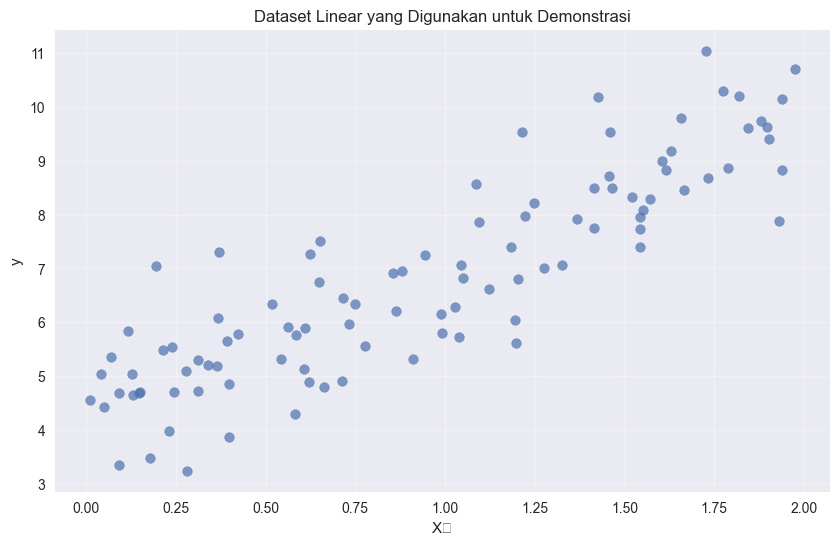

Data yang dibangkitkan: y = 4 + 3x₁ + noise
Shape X: (100, 1), Shape y: (100, 1)


In [3]:
# Generate data linear untuk demonstrasi
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Dataset Linear yang Digunakan untuk Demonstrasi')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Data yang dibangkitkan: y = 4 + 3x₁ + noise")
print(f"Shape X: {X.shape}, Shape y: {y.shape}")

## 2. NORMAL EQUATION

"""
TEORI NORMAL EQUATION:

Normal Equation adalah solusi closed-form untuk menemukan nilai θ yang optimal
untuk Linear Regression. Formula matematika:

θ̂ = (XᵀX)⁻¹Xᵀy

Keuntungan Normal Equation:
- Tidak perlu feature scaling
- Tidak perlu memilih learning rate
- Tidak perlu iterasi
- Langsung mendapat solusi optimal

Kerugian Normal Equation:
- Kompleksitas komputasi O(n²·⁴) hingga O(n³)
- Lambat jika jumlah features sangat besar (>100,000)
- XᵀX harus invertible (tidak singular)
"""

Implementasi Normal Equation:
Parameter optimal θ: [4.21509616 2.77011339]
θ₀ (bias): 4.215, θ₁ (weight): 2.770
Parameter asli: θ₀ = 4, θ₁ = 3

Prediksi:
Untuk x = 0: ŷ = 4.215
Untuk x = 2: ŷ = 9.755


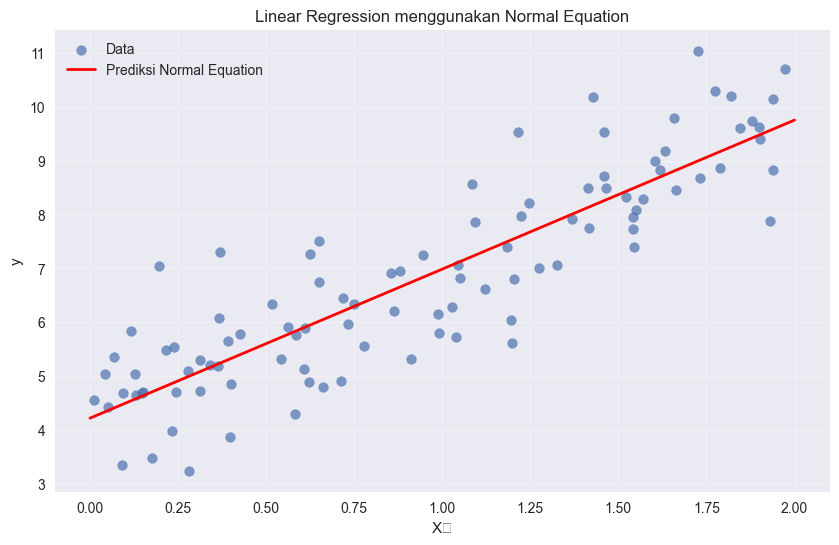


Perbandingan dengan Scikit-Learn:
Normal Equation - θ₀: 4.215096, θ₁: 2.770113
Scikit-Learn    - θ₀: 4.215096, θ₁: 2.770113


In [4]:
# Implementasi Normal Equation
X_b = np.c_[np.ones((100, 1)), X]  # menambahkan x₀ = 1 untuk bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Implementasi Normal Equation:")
print(f"Parameter optimal θ: {theta_best.ravel()}")
print(f"θ₀ (bias): {theta_best[0][0]:.3f}, θ₁ (weight): {theta_best[1][0]:.3f}")
print(f"Parameter asli: θ₀ = 4, θ₁ = 3")

# Membuat prediksi
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

print(f"\nPrediksi:")
print(f"Untuk x = 0: ŷ = {y_predict[0][0]:.3f}")
print(f"Untuk x = 2: ŷ = {y_predict[1][0]:.3f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Prediksi Normal Equation')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Linear Regression menggunakan Normal Equation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Bandingkan dengan Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"\nPerbandingan dengan Scikit-Learn:")
print(f"Normal Equation - θ₀: {theta_best[0][0]:.6f}, θ₁: {theta_best[1][0]:.6f}")
print(f"Scikit-Learn    - θ₀: {lin_reg.intercept_[0]:.6f}, θ₁: {lin_reg.coef_[0][0]:.6f}")

## 3. GRADIENT DESCENT

"""
TEORI GRADIENT DESCENT:

Gradient Descent adalah algoritma optimasi iteratif untuk menemukan minimum
dari cost function. Algoritma ini bekerja dengan:
1. Mulai dari nilai θ random
2. Hitung gradient dari cost function
3. Update parameter ke arah yang berlawanan dengan gradient
4. Ulangi hingga konvergen

Formula update:
θ^(next) = θ - η∇_θ MSE(θ)

Di mana:
- η (eta) adalah learning rate
- ∇_θ MSE(θ) adalah gradient vector dari MSE

Gradient MSE untuk Linear Regression:
∇_θ MSE(θ) = (2/m) Xᵀ(Xθ - y)

Ada 3 varian Gradient Descent:
1. Batch GD: menggunakan seluruh training set
2. Stochastic GD: menggunakan satu instance per iterasi
3. Mini-batch GD: menggunakan subset kecil training set
"""

### 3.1 BATCH GRADIENT DESCENT

"""
BATCH GRADIENT DESCENT:

Batch GD menggunakan seluruh training set untuk menghitung gradient
pada setiap step. Ini menjamin konvergensi ke global minimum untuk
cost function yang convex seperti MSE.

Keuntungan:
- Konvergen ke global optimum (untuk convex function)
- Stable convergence

Kerugian:
- Lambat untuk dataset besar
- Membutuhkan memory besar
"""

Menjalankan Batch Gradient Descent:
Iterasi 0: Cost = 15.504674, θ₀ = 0.557017, θ₁ = 2.011246
Iterasi 100: Cost = 0.417655, θ₀ = 3.911923, θ₁ = 3.037799
Iterasi 200: Cost = 0.403761, θ₀ = 4.160355, θ₁ = 2.818447
Iterasi 300: Cost = 0.403308, θ₀ = 4.205212, θ₁ = 2.778841
Iterasi 400: Cost = 0.403293, θ₀ = 4.213311, θ₁ = 2.771689
Iterasi 500: Cost = 0.403292, θ₀ = 4.214774, θ₁ = 2.770398
Iterasi 600: Cost = 0.403292, θ₀ = 4.215038, θ₁ = 2.770165
Iterasi 700: Cost = 0.403292, θ₀ = 4.215086, θ₁ = 2.770123
Iterasi 800: Cost = 0.403292, θ₀ = 4.215094, θ₁ = 2.770115
Iterasi 900: Cost = 0.403292, θ₀ = 4.215096, θ₁ = 2.770114

Hasil akhir Batch GD:
θ₀: 4.215096, θ₁: 2.770113


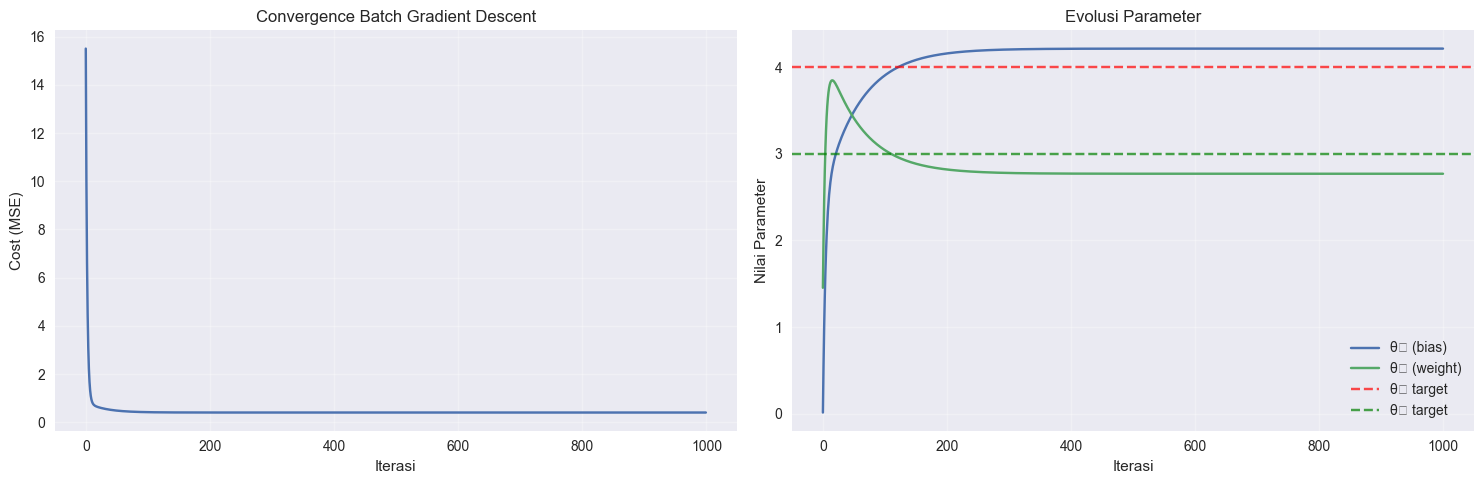

In [5]:
# Implementasi Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # menambahkan bias term
    theta = np.random.randn(2, 1)  # random initialization
    
    cost_history = []
    theta_history = [theta.copy()]
    
    for iteration in range(n_iterations):
        # Hitung prediksi
        predictions = X_b.dot(theta)
        
        # Hitung cost (MSE)
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        cost_history.append(cost)
        
        # Hitung gradient
        gradients = (1/m) * X_b.T.dot(predictions - y)
        
        # Update parameter
        theta = theta - learning_rate * gradients
        theta_history.append(theta.copy())
        
        # Print progress setiap 100 iterasi
        if iteration % 100 == 0:
            print(f"Iterasi {iteration}: Cost = {cost:.6f}, θ₀ = {theta[0][0]:.6f}, θ₁ = {theta[1][0]:.6f}")
    
    return theta, cost_history, theta_history

# Jalankan Batch Gradient Descent
print("Menjalankan Batch Gradient Descent:")
theta_bgd, cost_history, theta_history = batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000)

print(f"\nHasil akhir Batch GD:")
print(f"θ₀: {theta_bgd[0][0]:.6f}, θ₁: {theta_bgd[1][0]:.6f}")

# Visualisasi convergence
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot cost function
ax1.plot(cost_history)
ax1.set_xlabel('Iterasi')
ax1.set_ylabel('Cost (MSE)')
ax1.set_title('Convergence Batch Gradient Descent')
ax1.grid(True, alpha=0.3)

# Plot parameter evolution
theta_history = np.array(theta_history)
ax2.plot(theta_history[:, 0, 0], label='θ₀ (bias)')
ax2.plot(theta_history[:, 1, 0], label='θ₁ (weight)')
ax2.axhline(y=4, color='r', linestyle='--', alpha=0.7, label='θ₀ target')
ax2.axhline(y=3, color='g', linestyle='--', alpha=0.7, label='θ₁ target')
ax2.set_xlabel('Iterasi')
ax2.set_ylabel('Nilai Parameter')
ax2.set_title('Evolusi Parameter')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 STOCHASTIC GRADIENT DESCENT

"""
STOCHASTIC GRADIENT DESCENT (SGD):

SGD menggunakan satu training instance secara random pada setiap iterasi.
Ini membuat algoritma lebih cepat dan mampu menangani dataset besar.

Keuntungan:
- Sangat cepat untuk dataset besar
- Bisa escape dari local minima
- Memory efficient

Kerugian:
- Path menuju optimum tidak smooth (bouncing)
- Tidak pernah benar-benar konvergen, terus bouncing
- Perlu learning rate schedule untuk konvergensi

Learning Rate Schedule:
Untuk konvergensi yang baik, learning rate harus dikurangi secara bertahap:
η(t) = η₀ / (t + t₁)
"""

Menjalankan Stochastic Gradient Descent:
Epoch 0: Cost = 1.061499, θ₀ = 3.139474, θ₁ = 3.435255
Epoch 10: Cost = 0.411205, θ₀ = 4.051302, θ₁ = 2.901998
Epoch 20: Cost = 0.406687, θ₀ = 4.123991, θ₁ = 2.853470
Epoch 30: Cost = 0.405406, θ₀ = 4.147026, θ₁ = 2.828005
Epoch 40: Cost = 0.404798, θ₀ = 4.160584, θ₁ = 2.815102

Hasil akhir Stochastic GD:
θ₀: 4.169588, θ₁: 2.808981


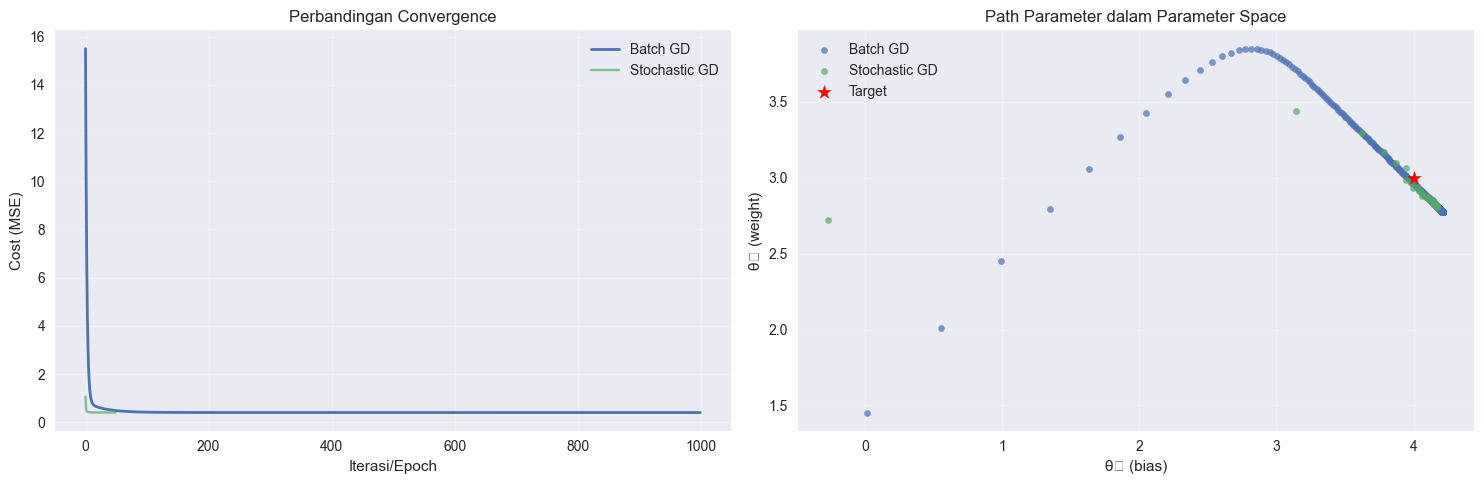


Perbandingan dengan Scikit-Learn SGDRegressor:
SGDRegressor - θ₀: 4.243653, θ₁: 2.825088


In [6]:
def stochastic_gradient_descent(X, y, n_epochs=50, learning_rate_schedule=None):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # menambahkan bias term
    theta = np.random.randn(n + 1, 1)  # random initialization
    
    if learning_rate_schedule is None:
        learning_rate_schedule = lambda t: 0.1  # constant learning rate
    
    cost_history = []
    theta_history = [theta.copy()]
    
    for epoch in range(n_epochs):
        epoch_cost = 0
        # Shuffle data setiap epoch
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(m):
            # Pilih satu instance
            xi = X_b_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            
            # Hitung gradient untuk instance ini
            prediction = xi.dot(theta)
            gradient = xi.T.dot(prediction - yi)
            
            # Update parameter
            learning_rate = learning_rate_schedule(epoch * m + i)
            theta = theta - learning_rate * gradient
            
            # Hitung cost untuk monitoring
            epoch_cost += (prediction - yi)**2
        
        # Rata-rata cost untuk epoch ini
        epoch_cost = epoch_cost[0][0] / (2 * m)
        cost_history.append(epoch_cost)
        theta_history.append(theta.copy())
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {epoch_cost:.6f}, θ₀ = {theta[0][0]:.6f}, θ₁ = {theta[1][0]:.6f}")
    
    return theta, cost_history, theta_history

# Learning rate schedule
def learning_schedule(t):
    t0, t1 = 5, 50
    return t0 / (t + t1)

print("Menjalankan Stochastic Gradient Descent:")
theta_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(
    X, y, n_epochs=50, learning_rate_schedule=learning_schedule
)

print(f"\nHasil akhir Stochastic GD:")
print(f"θ₀: {theta_sgd[0][0]:.6f}, θ₁: {theta_sgd[1][0]:.6f}")

# Visualisasi perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot cost comparison
ax1.plot(cost_history, label='Batch GD', linewidth=2)
ax1.plot(cost_history_sgd, label='Stochastic GD', alpha=0.7)
ax1.set_xlabel('Iterasi/Epoch')
ax1.set_ylabel('Cost (MSE)')
ax1.set_title('Perbandingan Convergence')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot parameter path comparison
theta_history_sgd = np.array(theta_history_sgd)
ax2.scatter(theta_history[:, 0, 0], theta_history[:, 1, 0], 
           alpha=0.7, label='Batch GD', s=20)
ax2.scatter(theta_history_sgd[:, 0, 0], theta_history_sgd[:, 1, 0], 
           alpha=0.7, label='Stochastic GD', s=20)
ax2.scatter([4], [3], color='red', s=100, marker='*', label='Target')
ax2.set_xlabel('θ₀ (bias)')
ax2.set_ylabel('θ₁ (weight)')
ax2.set_title('Path Parameter dalam Parameter Space')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Implementasi dengan Scikit-Learn
print("\nPerbandingan dengan Scikit-Learn SGDRegressor:")
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f"SGDRegressor - θ₀: {sgd_reg.intercept_[0]:.6f}, θ₁: {sgd_reg.coef_[0]:.6f}")

### 3.3 MINI-BATCH GRADIENT DESCENT

"""
MINI-BATCH GRADIENT DESCENT:

Mini-batch GD adalah kompromi antara Batch GD dan Stochastic GD.
Algoritma ini menggunakan subset kecil (mini-batch) dari training set
pada setiap iterasi.

Keuntungan:
- Lebih cepat dari Batch GD
- Lebih stable dari Stochastic GD
- Dapat memanfaatkan optimasi hardware (vectorization)
- Path ke optimum lebih smooth dari SGD

Parameter penting:
- Batch size: biasanya 32, 64, 128, 256
"""

Menjalankan Mini-batch Gradient Descent:
Epoch 0: Cost = 12.634978, θ₀ = 3.384895, θ₁ = 1.457608
Epoch 10: Cost = 0.406608, θ₀ = 4.288447, θ₁ = 2.704561
Epoch 20: Cost = 0.408932, θ₀ = 4.232593, θ₁ = 2.727325
Epoch 30: Cost = 0.404179, θ₀ = 4.224595, θ₁ = 2.752516
Epoch 40: Cost = 0.406044, θ₀ = 4.231614, θ₁ = 2.781040

Hasil akhir Mini-batch GD:
θ₀: 4.211669, θ₁: 2.762382


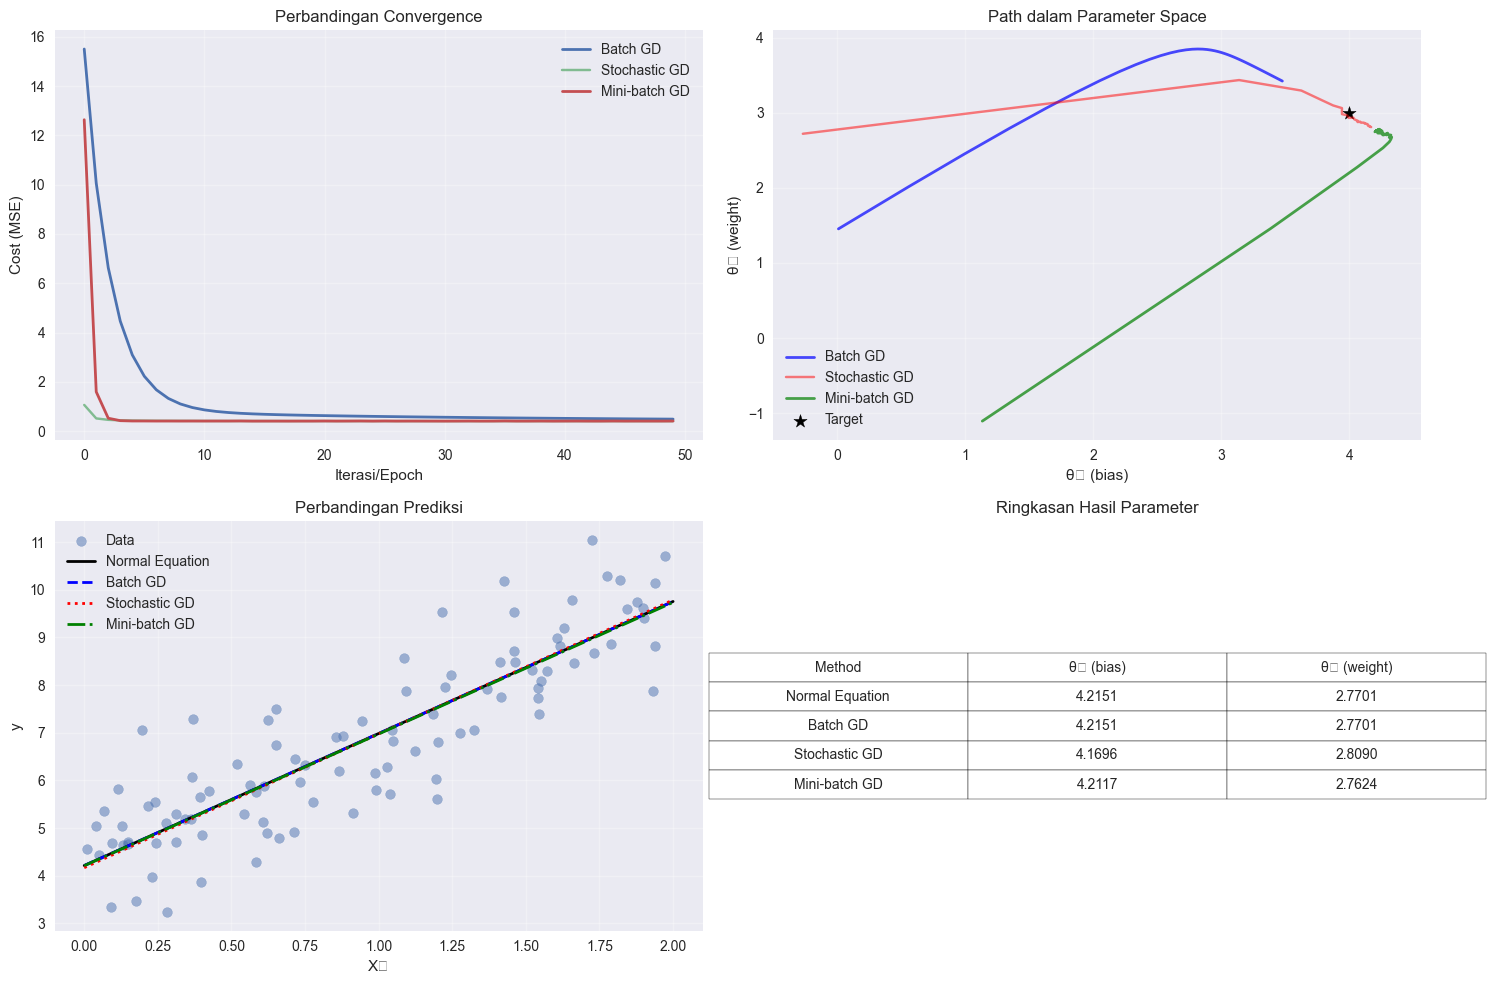

In [7]:
def mini_batch_gradient_descent(X, y, batch_size=20, n_epochs=50, learning_rate=0.1):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # menambahkan bias term
    theta = np.random.randn(n + 1, 1)  # random initialization
    
    cost_history = []
    theta_history = [theta.copy()]
    
    for epoch in range(n_epochs):
        epoch_cost = 0
        # Shuffle data
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # Proses dalam mini-batches
        for i in range(0, m, batch_size):
            # Ambil mini-batch
            X_batch = X_b_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # Hitung gradient untuk mini-batch
            predictions = X_batch.dot(theta)
            gradients = (1/len(X_batch)) * X_batch.T.dot(predictions - y_batch)
            
            # Update parameter
            theta = theta - learning_rate * gradients
            
            # Akumulasi cost
            epoch_cost += np.sum((predictions - y_batch)**2)
        
        # Rata-rata cost untuk epoch
        epoch_cost = epoch_cost / (2 * m)
        cost_history.append(epoch_cost)
        theta_history.append(theta.copy())
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {epoch_cost:.6f}, θ₀ = {theta[0][0]:.6f}, θ₁ = {theta[1][0]:.6f}")
    
    return theta, cost_history, theta_history

print("Menjalankan Mini-batch Gradient Descent:")
theta_mbgd, cost_history_mbgd, theta_history_mbgd = mini_batch_gradient_descent(
    X, y, batch_size=20, n_epochs=50, learning_rate=0.1
)

print(f"\nHasil akhir Mini-batch GD:")
print(f"θ₀: {theta_mbgd[0][0]:.6f}, θ₁: {theta_mbgd[1][0]:.6f}")

# Visualisasi perbandingan ketiga metode
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Cost comparison
axes[0,0].plot(cost_history[:50], label='Batch GD', linewidth=2)
axes[0,0].plot(cost_history_sgd, label='Stochastic GD', alpha=0.7)
axes[0,0].plot(cost_history_mbgd, label='Mini-batch GD', linewidth=2)
axes[0,0].set_xlabel('Iterasi/Epoch')
axes[0,0].set_ylabel('Cost (MSE)')
axes[0,0].set_title('Perbandingan Convergence')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Parameter path
theta_history_mbgd = np.array(theta_history_mbgd)
axes[0,1].plot(theta_history[:50, 0, 0], theta_history[:50, 1, 0], 
               'b-', label='Batch GD', linewidth=2, alpha=0.7)
axes[0,1].plot(theta_history_sgd[:, 0, 0], theta_history_sgd[:, 1, 0], 
               'r-', label='Stochastic GD', alpha=0.5)
axes[0,1].plot(theta_history_mbgd[:, 0, 0], theta_history_mbgd[:, 1, 0], 
               'g-', label='Mini-batch GD', linewidth=2, alpha=0.7)
axes[0,1].scatter([4], [3], color='black', s=100, marker='*', label='Target')
axes[0,1].set_xlabel('θ₀ (bias)')
axes[0,1].set_ylabel('θ₁ (weight)')
axes[0,1].set_title('Path dalam Parameter Space')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Hasil prediksi
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_b = np.c_[np.ones((100, 1)), X_test]

y_pred_normal = X_test_b.dot(theta_best)
y_pred_bgd = X_test_b.dot(theta_bgd)
y_pred_sgd = X_test_b.dot(theta_sgd)
y_pred_mbgd = X_test_b.dot(theta_mbgd)

axes[1,0].scatter(X, y, alpha=0.5, label='Data')
axes[1,0].plot(X_test, y_pred_normal, 'k-', label='Normal Equation', linewidth=2)
axes[1,0].plot(X_test, y_pred_bgd, 'b--', label='Batch GD', linewidth=2)
axes[1,0].plot(X_test, y_pred_sgd, 'r:', label='Stochastic GD', linewidth=2)
axes[1,0].plot(X_test, y_pred_mbgd, 'g-.', label='Mini-batch GD', linewidth=2)
axes[1,0].set_xlabel('X₁')
axes[1,0].set_ylabel('y')
axes[1,0].set_title('Perbandingan Prediksi')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Summary table
methods = ['Normal Equation', 'Batch GD', 'Stochastic GD', 'Mini-batch GD']
theta0_values = [theta_best[0][0], theta_bgd[0][0], theta_sgd[0][0], theta_mbgd[0][0]]
theta1_values = [theta_best[1][0], theta_bgd[1][0], theta_sgd[1][0], theta_mbgd[1][0]]

axes[1,1].axis('tight')
axes[1,1].axis('off')
table_data = []
for i, method in enumerate(methods):
    table_data.append([method, f"{theta0_values[i]:.4f}", f"{theta1_values[i]:.4f}"])

table = axes[1,1].table(cellText=table_data,
                       colLabels=['Method', 'θ₀ (bias)', 'θ₁ (weight)'],
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1,1].set_title('Ringkasan Hasil Parameter')

plt.tight_layout()
plt.show()

## 4. POLYNOMIAL REGRESSION

"""
TEORI POLYNOMIAL REGRESSION:

Polynomial Regression adalah perluasan dari Linear Regression untuk data non-linear.
Ide dasarnya adalah menambahkan powers dari features sebagai features baru,
kemudian melatih Linear Regression pada extended feature set.

Contoh untuk satu feature:
- Original: x₁
- Degree 2: x₁, x₁²
- Degree 3: x₁, x₁², x₁³

Untuk multiple features, PolynomialFeatures juga menambahkan kombinasi:
- Features: a, b
- Degree 2: a, b, a², ab, b²
- Degree 3: a, b, a², ab, b², a³, a²b, ab², b³

Jumlah features dengan PolynomialFeatures(degree=d) untuk n features:
(n + d)! / (d! × n!)

PERINGATAN: Kombinatorial explosion! Berhati-hati dengan degree tinggi.
"""

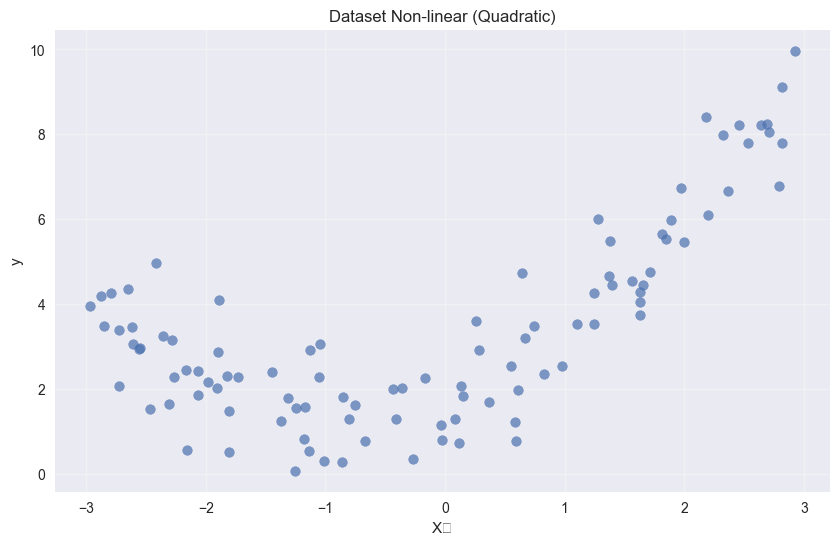

Data yang dibangkitkan: y = 0.5x₁² + x₁ + 2 + noise

Original features shape: (100, 1)
Extended features shape: (100, 2)
Feature names: ['x1' 'x1^2']

Contoh transformasi:
Original x₁: -0.753
Extended [x₁, x₁²]: [-0.75275929  0.56664654]

Parameter Polynomial Regression:
θ₀ (intercept): 1.781
θ₁ (x₁): 0.934
θ₂ (x₁²): 0.565
Formula: ŷ = 1.781 + 0.934x₁ + 0.565x₁²
Formula asli: y = 2.0 + 1.0x₁ + 0.5x₁²


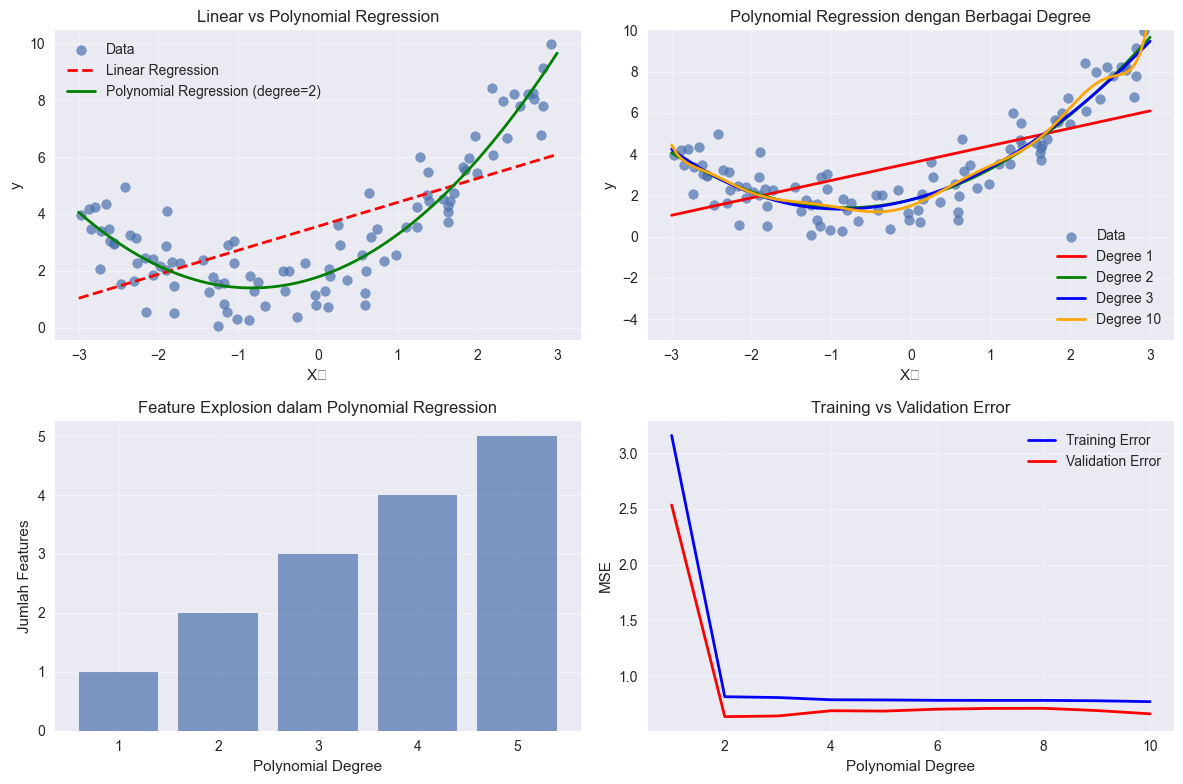

In [8]:
# Generate data non-linear
np.random.seed(42)
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1)

# Visualisasi data non-linear
plt.figure(figsize=(10, 6))
plt.scatter(X_poly, y_poly, alpha=0.7)
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Dataset Non-linear (Quadratic)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Data yang dibangkitkan: y = 0.5x₁² + x₁ + 2 + noise")

# Coba Linear Regression biasa (akan underfitting)
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_poly, y_poly)

# Polynomial Regression degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_extended = poly_features.fit_transform(X_poly)

print(f"\nOriginal features shape: {X_poly.shape}")
print(f"Extended features shape: {X_poly_extended.shape}")
print(f"Feature names: {poly_features.get_feature_names_out(['x1'])}")

# Lihat sample data
print(f"\nContoh transformasi:")
print(f"Original x₁: {X_poly[0][0]:.3f}")
print(f"Extended [x₁, x₁²]: {X_poly_extended[0]}")

# Train polynomial regression
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_extended, y_poly)

print(f"\nParameter Polynomial Regression:")
print(f"θ₀ (intercept): {lin_reg_poly.intercept_[0]:.3f}")
print(f"θ₁ (x₁): {lin_reg_poly.coef_[0][0]:.3f}")
print(f"θ₂ (x₁²): {lin_reg_poly.coef_[0][1]:.3f}")
print(f"Formula: ŷ = {lin_reg_poly.intercept_[0]:.3f} + {lin_reg_poly.coef_[0][0]:.3f}x₁ + {lin_reg_poly.coef_[0][1]:.3f}x₁²")
print(f"Formula asli: y = 2.0 + 1.0x₁ + 0.5x₁²")

# Visualisasi perbandingan
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

y_plot_linear = lin_reg_simple.predict(X_plot)
y_plot_poly = lin_reg_poly.predict(X_plot_poly)

plt.figure(figsize=(12, 8))

# Plot 1: Linear vs Polynomial
plt.subplot(2, 2, 1)
plt.scatter(X_poly, y_poly, alpha=0.7, label='Data')
plt.plot(X_plot, y_plot_linear, 'r--', linewidth=2, label='Linear Regression')
plt.plot(X_plot, y_plot_poly, 'g-', linewidth=2, label='Polynomial Regression (degree=2)')
plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Polynomial dengan berbagai degree
degrees = [1, 2, 3, 10]
plt.subplot(2, 2, 2)
plt.scatter(X_poly, y_poly, alpha=0.7, label='Data')

colors = ['red', 'green', 'blue', 'orange']
for i, degree in enumerate(degrees):
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_deg = poly_feat.fit_transform(X_poly)
    lin_reg_deg = LinearRegression()
    lin_reg_deg.fit(X_poly_deg, y_poly)
    
    X_plot_deg = poly_feat.transform(X_plot)
    y_plot_deg = lin_reg_deg.predict(X_plot_deg)
    
    plt.plot(X_plot, y_plot_deg, color=colors[i], linewidth=2, 
             label=f'Degree {degree}')

plt.xlabel('X₁')
plt.ylabel('y')
plt.title('Polynomial Regression dengan Berbagai Degree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-5, 10)

# Plot 3: Feature explosion demonstration
degrees_range = range(1, 6)
feature_counts = []
for deg in degrees_range:
    poly_feat = PolynomialFeatures(degree=deg, include_bias=False)
    X_temp = poly_feat.fit_transform(X_poly[:5])  # sample kecil
    feature_counts.append(X_temp.shape[1])

plt.subplot(2, 2, 3)
plt.bar(degrees_range, feature_counts, alpha=0.7)
plt.xlabel('Polynomial Degree')
plt.ylabel('Jumlah Features')
plt.title('Feature Explosion dalam Polynomial Regression')
plt.grid(True, alpha=0.3)

# Plot 4: MSE comparison
plt.subplot(2, 2, 4)
train_errors = []
test_errors = []

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

for degree in range(1, 11):
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_feat.fit_transform(X_train)
    X_test_poly = poly_feat.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    
    y_train_pred = lin_reg.predict(X_train_poly)
    y_test_pred = lin_reg.predict(X_test_poly)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot(range(1, 11), train_errors, 'b-', label='Training Error', linewidth=2)
plt.plot(range(1, 11), test_errors, 'r-', label='Validation Error', linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Training vs Validation Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. LEARNING CURVES

"""
TEORI LEARNING CURVES:

Learning curves adalah plot performa model (training dan validation error)
sebagai fungsi dari ukuran training set atau training iteration.

Kegunaan Learning Curves:
1. Mendeteksi overfitting/underfitting
2. Menentukan apakah perlu lebih banyak data
3. Memilih kompleksitas model yang tepat

Interpretasi Learning Curves:

UNDERFITTING (High Bias):
- Training error tinggi dan plateau
- Validation error tinggi dan mendekati training error
- Gap kecil antara training dan validation error
- Solusi: model lebih kompleks, lebih banyak features

OVERFITTING (High Variance):
- Training error rendah
- Validation error jauh lebih tinggi dari training error
- Gap besar antara kedua kurva
- Solusi: regularization, lebih banyak data, model lebih sederhana

GOOD FIT:
- Training error rendah
- Validation error rendah dan mendekati training error
- Gap kecil antara kedua kurva
"""

Linear Regression pada data non-linear menunjukkan underfitting:
- Training error akhir: 1.777
- Validation error akhir: 1.592
- Gap: -0.185

Polynomial Regression degree 2 menunjukkan good fit:
- Training error akhir: 0.903
- Validation error akhir: 0.797
- Gap: -0.105

Polynomial Regression degree 10 menunjukkan overfitting:
- Training error akhir: 0.878
- Validation error akhir: 0.813
- Gap: -0.065

Degree optimal berdasarkan validation error: 2


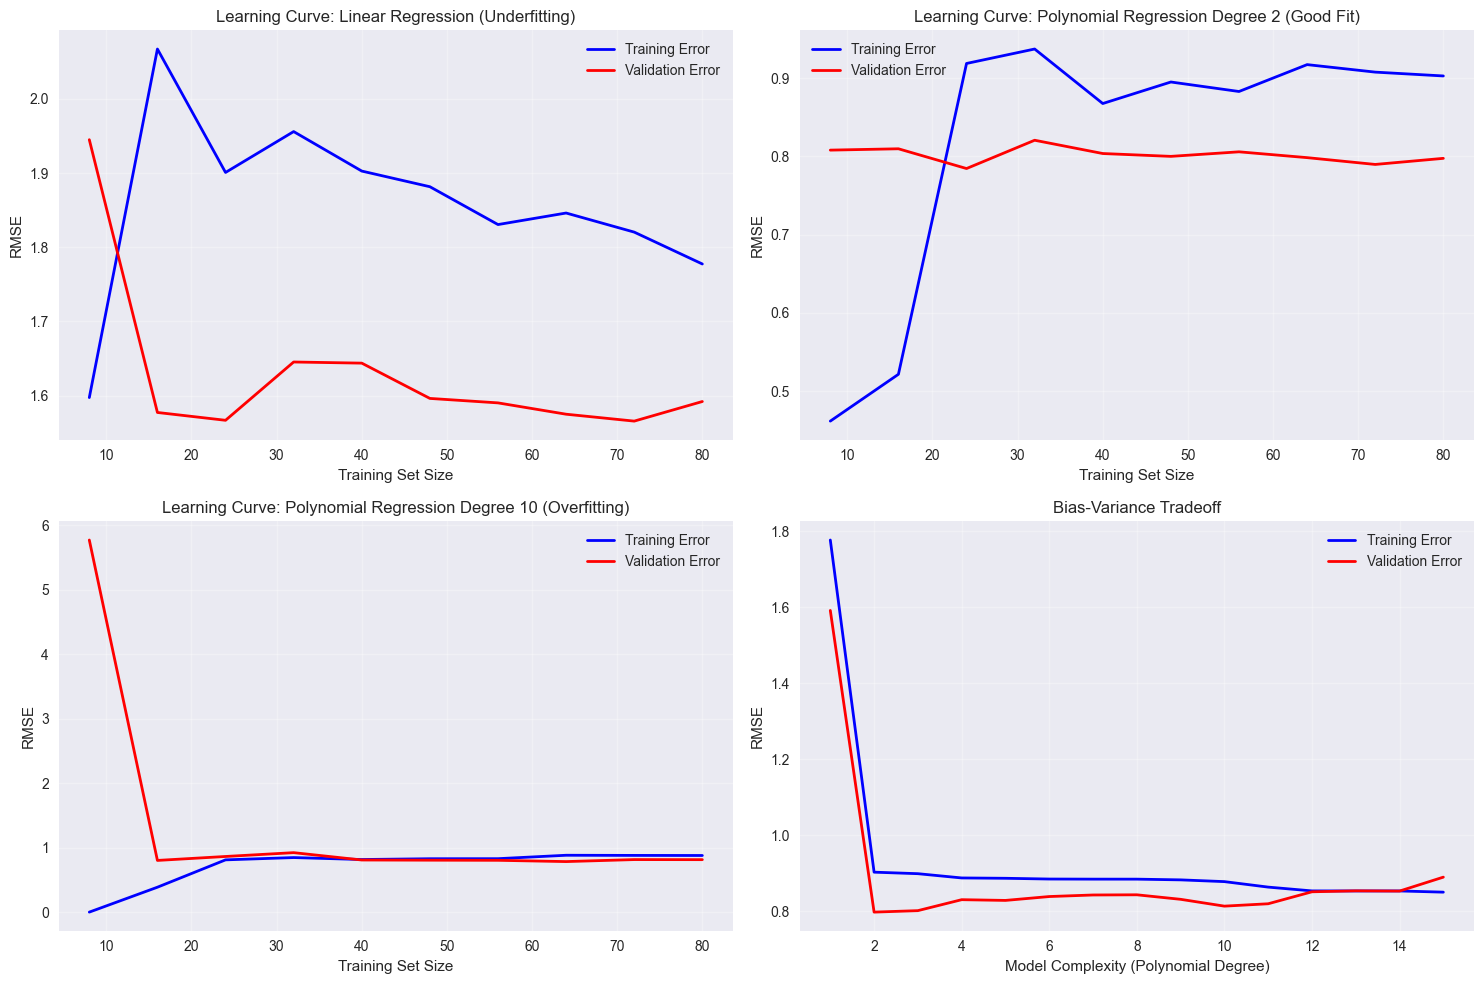

In [9]:
def plot_learning_curves(model, X, y, train_sizes=None):
    """
    Plot learning curves untuk model yang diberikan
    """
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 10)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_errors = []
    val_errors = []
    
    for train_size in train_sizes:
        # Tentukan jumlah sample untuk training
        n_samples = int(train_size * len(X_train))
        if n_samples < 1:
            n_samples = 1
            
        # Ambil subset data
        X_train_subset = X_train[:n_samples]
        y_train_subset = y_train[:n_samples]
        
        # Train model
        model.fit(X_train_subset, y_train_subset)
        
        # Prediksi
        y_train_pred = model.predict(X_train_subset)
        y_val_pred = model.predict(X_val)
        
        # Hitung error
        train_error = mean_squared_error(y_train_subset, y_train_pred)
        val_error = mean_squared_error(y_val, y_val_pred)
        
        train_errors.append(train_error)
        val_errors.append(val_error)
    
    return train_sizes * len(X_train), train_errors, val_errors

# Generate learning curves untuk berbagai model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Linear Regression (underfitting)
train_sizes, train_errors, val_errors = plot_learning_curves(
    LinearRegression(), X_poly, y_poly
)

axes[0,0].plot(train_sizes, np.sqrt(train_errors), 'b-', linewidth=2, label='Training Error')
axes[0,0].plot(train_sizes, np.sqrt(val_errors), 'r-', linewidth=2, label='Validation Error')
axes[0,0].set_xlabel('Training Set Size')
axes[0,0].set_ylabel('RMSE')
axes[0,0].set_title('Learning Curve: Linear Regression (Underfitting)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

print("Linear Regression pada data non-linear menunjukkan underfitting:")
print(f"- Training error akhir: {np.sqrt(train_errors[-1]):.3f}")
print(f"- Validation error akhir: {np.sqrt(val_errors[-1]):.3f}")
print(f"- Gap: {np.sqrt(val_errors[-1]) - np.sqrt(train_errors[-1]):.3f}")

# 2. Polynomial Regression degree 2 (good fit)
poly_reg_2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

train_sizes, train_errors, val_errors = plot_learning_curves(poly_reg_2, X_poly, y_poly)

axes[0,1].plot(train_sizes, np.sqrt(train_errors), 'b-', linewidth=2, label='Training Error')
axes[0,1].plot(train_sizes, np.sqrt(val_errors), 'r-', linewidth=2, label='Validation Error')
axes[0,1].set_xlabel('Training Set Size')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_title('Learning Curve: Polynomial Regression Degree 2 (Good Fit)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

print(f"\nPolynomial Regression degree 2 menunjukkan good fit:")
print(f"- Training error akhir: {np.sqrt(train_errors[-1]):.3f}")
print(f"- Validation error akhir: {np.sqrt(val_errors[-1]):.3f}")
print(f"- Gap: {np.sqrt(val_errors[-1]) - np.sqrt(train_errors[-1]):.3f}")

# 3. Polynomial Regression degree 10 (overfitting)
poly_reg_10 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

train_sizes, train_errors, val_errors = plot_learning_curves(poly_reg_10, X_poly, y_poly)

axes[1,0].plot(train_sizes, np.sqrt(train_errors), 'b-', linewidth=2, label='Training Error')
axes[1,0].plot(train_sizes, np.sqrt(val_errors), 'r-', linewidth=2, label='Validation Error')
axes[1,0].set_xlabel('Training Set Size')
axes[1,0].set_ylabel('RMSE')
axes[1,0].set_title('Learning Curve: Polynomial Regression Degree 10 (Overfitting)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

print(f"\nPolynomial Regression degree 10 menunjukkan overfitting:")
print(f"- Training error akhir: {np.sqrt(train_errors[-1]):.3f}")
print(f"- Validation error akhir: {np.sqrt(val_errors[-1]):.3f}")
print(f"- Gap: {np.sqrt(val_errors[-1]) - np.sqrt(train_errors[-1]):.3f}")

# 4. Bias-Variance tradeoff illustration
degrees = range(1, 16)
training_errors = []
validation_errors = []

X_train, X_val, y_train, y_val = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

for degree in degrees:
    poly_reg = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lin_reg', LinearRegression())
    ])
    
    poly_reg.fit(X_train, y_train)
    
    y_train_pred = poly_reg.predict(X_train)
    y_val_pred = poly_reg.predict(X_val)
    
    training_errors.append(mean_squared_error(y_train, y_train_pred))
    validation_errors.append(mean_squared_error(y_val, y_val_pred))

axes[1,1].plot(degrees, np.sqrt(training_errors), 'b-', linewidth=2, label='Training Error')
axes[1,1].plot(degrees, np.sqrt(validation_errors), 'r-', linewidth=2, label='Validation Error')
axes[1,1].set_xlabel('Model Complexity (Polynomial Degree)')
axes[1,1].set_ylabel('RMSE')
axes[1,1].set_title('Bias-Variance Tradeoff')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Temukan degree optimal
optimal_degree = degrees[np.argmin(validation_errors)]
print(f"\nDegree optimal berdasarkan validation error: {optimal_degree}")

plt.tight_layout()
plt.show()


In [11]:
print("\n" + "="*60)
print("RINGKASAN CHAPTER 4 - PART 1")
print("="*60)
print("""
Dalam bagian pertama Chapter 4 ini, kita telah mempelajari:

1. LINEAR REGRESSION:
   - Model fundamental untuk regression tasks
   - Formula: ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
   - Tujuan: minimalisasi MSE

2. NORMAL EQUATION:
   - Solusi closed-form: θ̂ = (XᵀX)⁻¹Xᵀy
   - Cepat untuk features sedikit, lambat untuk features banyak
   - Tidak perlu feature scaling

3. GRADIENT DESCENT:
   - Batch GD: stabil tapi lambat untuk data besar
   - Stochastic GD: cepat tapi bouncing, perlu learning rate schedule
   - Mini-batch GD: kompromi terbaik, paling praktis digunakan

4. POLYNOMIAL REGRESSION:
   - Extend Linear Regression untuk data non-linear
   - Menambahkan polynomial features: x₁, x₁², x₁³, ...
   - Hati-hati kombinatorial explosion

5. LEARNING CURVES:
   - Tool untuk diagnosa overfitting/underfitting
   - High bias (underfitting): kedua error tinggi, gap kecil
   - High variance (overfitting): training error rendah, validation error tinggi, gap besar

Selanjutnya kita akan membahas Regularized Linear Models dan teknik-teknik lanjutan.
""")


RINGKASAN CHAPTER 4 - PART 1

Dalam bagian pertama Chapter 4 ini, kita telah mempelajari:

1. LINEAR REGRESSION:
   - Model fundamental untuk regression tasks
   - Formula: ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
   - Tujuan: minimalisasi MSE

2. NORMAL EQUATION:
   - Solusi closed-form: θ̂ = (XᵀX)⁻¹Xᵀy
   - Cepat untuk features sedikit, lambat untuk features banyak
   - Tidak perlu feature scaling

3. GRADIENT DESCENT:
   - Batch GD: stabil tapi lambat untuk data besar
   - Stochastic GD: cepat tapi bouncing, perlu learning rate schedule
   - Mini-batch GD: kompromi terbaik, paling praktis digunakan

4. POLYNOMIAL REGRESSION:
   - Extend Linear Regression untuk data non-linear
   - Menambahkan polynomial features: x₁, x₁², x₁³, ...
   - Hati-hati kombinatorial explosion

5. LEARNING CURVES:
   - Tool untuk diagnosa overfitting/underfitting
   - High bias (underfitting): kedua error tinggi, gap kecil
   - High variance (overfitting): training error rendah, validation error tinggi, gap besar

## 6. REGULARIZED LINEAR MODELS

"""
TEORI REGULARIZATION:

Regularization adalah teknis untuk mengurangi overfitting dengan menambahkan
penalty term pada cost function. Tujuannya adalah mencegah model dari
menjadi terlalu kompleks dengan membatasi magnitude dari parameter.

Mengapa Regularization Diperlukan:
1. Mengurangi overfitting
2. Mencegah parameter menjadi terlalu besar
3. Meningkatkan generalisasi model
4. Menangani multicollinearity

Jenis-jenis Regularization:
1. Ridge (L2): penalty = α × ½∑θᵢ²
2. Lasso (L1): penalty = α × ∑|θᵢ|
3. Elastic Net: kombinasi L1 dan L2

Parameter α (alpha) mengontrol kekuatan regularization:
- α = 0: tidak ada regularization (Linear Regression biasa)
- α besar: regularization kuat, model lebih sederhana
"""

### 6.1 RIDGE REGRESSION (L2 REGULARIZATION)

"""
RIDGE REGRESSION:

Ridge Regression menambahkan L2 penalty term pada cost function:
J(θ) = MSE(θ) + α × ½∑ᵢ₌₁ⁿ θᵢ²

Karakteristik Ridge:
- Menyusutkan koefisien menuju nol tapi tidak pernah tepat nol
- Menangani multicollinearity dengan baik
- Mempertahankan semua features
- Solusi closed-form tersedia: θ̂ = (XᵀX + αI)⁻¹Xᵀy

Penting: Ridge sensitif terhadap skala features, jadi perlu feature scaling!
"""


Features shape after polynomial transformation: (100, 10)
Degree 10 polynomial menghasilkan 10 features

Ridge α=0:
  Training MSE: 0.7704
  Test MSE: 0.6612
  Coefficients L2 norm: 60.7347

Ridge α=0.1:
  Training MSE: 0.7820
  Test MSE: 0.6923
  Coefficients L2 norm: 2.8862

Ridge α=1:
  Training MSE: 0.7968
  Test MSE: 0.6369
  Coefficients L2 norm: 2.3213

Ridge α=10:
  Training MSE: 0.9368
  Test MSE: 0.6691
  Coefficients L2 norm: 1.6088

Ridge α=100:
  Training MSE: 1.7028
  Test MSE: 1.6134
  Coefficients L2 norm: 0.7789


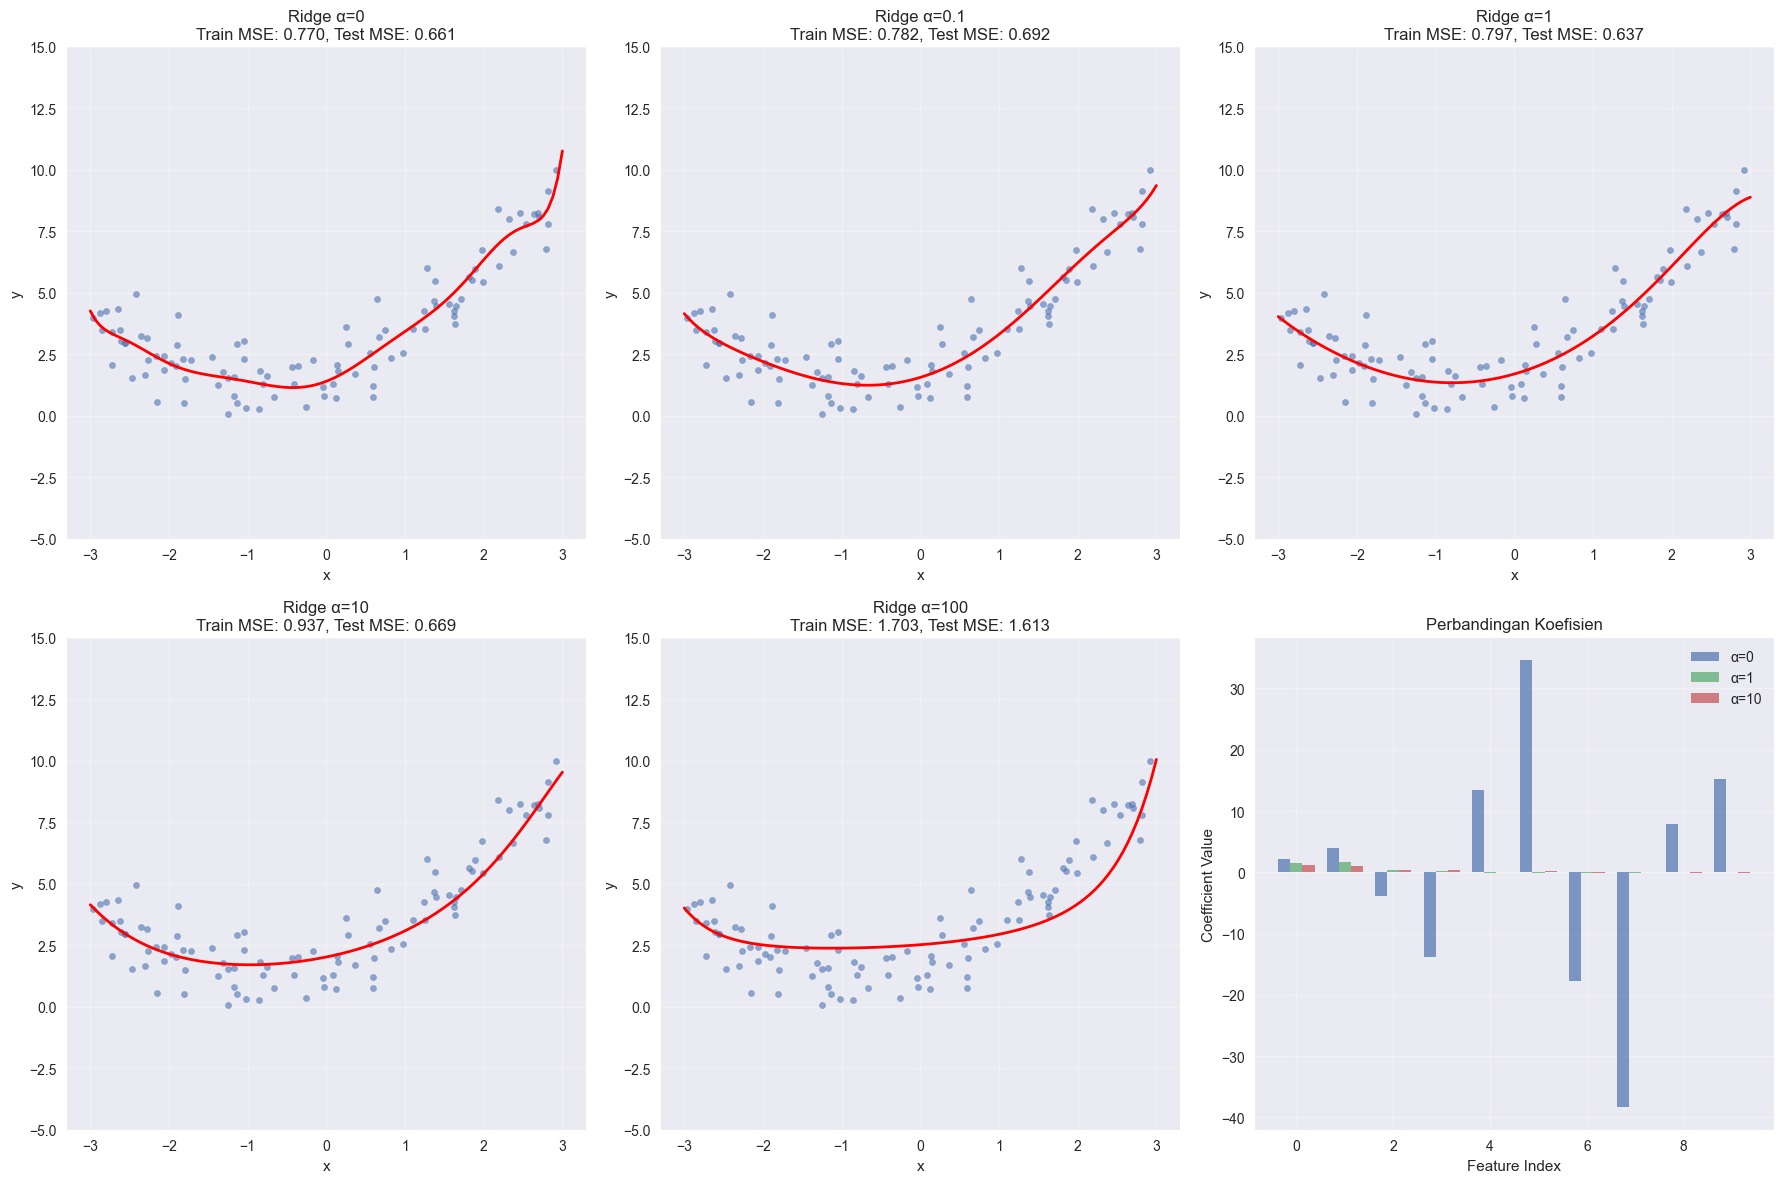

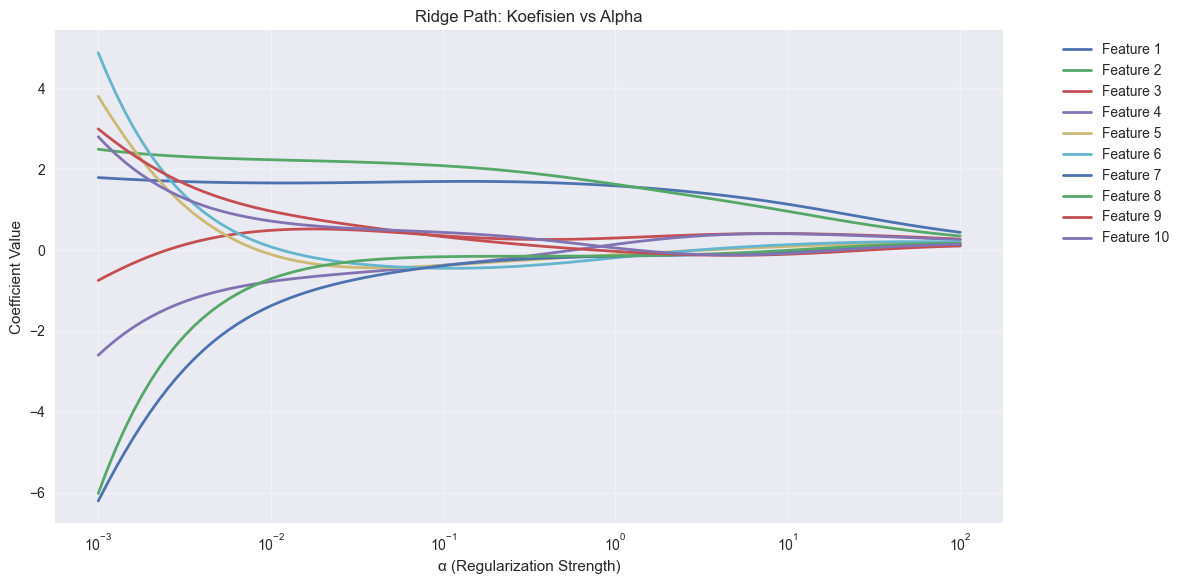

In [14]:
# Generate data dengan noise untuk demonstrasi regularization
np.random.seed(42)
m = 100
X_reg = 6 * np.random.rand(m, 1) - 3
y_reg = 0.5 * X_reg**2 + X_reg + 2 + np.random.randn(m, 1)

# Buat polynomial features degree tinggi (prone to overfitting)
poly_reg_ridge = PolynomialFeatures(degree=10, include_bias=False)
X_poly_reg = poly_reg_ridge.fit_transform(X_reg)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly_reg, y_reg, test_size=0.2, random_state=42)

# Scaling (penting untuk regularization!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Features shape after polynomial transformation: {X_poly_reg.shape}")
print(f"Degree 10 polynomial menghasilkan {X_poly_reg.shape[1]} features")

# Compare different alpha values
alphas = [0, 0.1, 1, 10, 100]
ridge_models = {}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    # Train Ridge Regression
    ridge_reg = Ridge(alpha=alpha, solver="cholesky", random_state=42)
    ridge_reg.fit(X_train_scaled, y_train)
    ridge_models[alpha] = ridge_reg
    
    # Predictions
    y_train_pred = ridge_reg.predict(X_train_scaled)
    y_test_pred = ridge_reg.predict(X_test_scaled)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"\nRidge α={alpha}:")
    print(f"  Training MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Coefficients L2 norm: {np.linalg.norm(ridge_reg.coef_):.4f}")
    
    # Plot predictions
    X_plot_reg = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_plot_poly_reg = poly_reg_ridge.transform(X_plot_reg)
    X_plot_scaled = scaler.transform(X_plot_poly_reg)
    y_plot_pred = ridge_reg.predict(X_plot_scaled)
    
    axes[i].scatter(X_reg, y_reg, alpha=0.6, s=20)
    axes[i].plot(X_plot_reg, y_plot_pred, 'r-', linewidth=2)
    axes[i].set_title(f'Ridge α={alpha}\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-5, 15)

# Plot coefficient comparison
coef_indices = range(X_poly_reg.shape[1])
width = 0.25
x_pos = np.arange(len(coef_indices))

axes[5].bar(x_pos - width, ridge_models[0].coef_, width, alpha=0.7, label='α=0')
axes[5].bar(x_pos, ridge_models[1].coef_, width, alpha=0.7, label='α=1') 
axes[5].bar(x_pos + width, ridge_models[10].coef_, width, alpha=0.7, label='α=10')
axes[5].set_title('Perbandingan Koefisien')
axes[5].set_xlabel('Feature Index')
axes[5].set_ylabel('Coefficient Value')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ridge path - bagaimana koefisien berubah dengan alpha
alphas_path = np.logspace(-3, 2, 100)
ridge_path = Ridge()
coefs = []

for alpha in alphas_path:
    ridge_path.set_params(alpha=alpha)
    ridge_path.fit(X_train_scaled, y_train)
    coefs.append(ridge_path.coef_)

plt.figure(figsize=(12, 6))
coefs = np.array(coefs)
for i in range(coefs.shape[1]):
    plt.plot(alphas_path, coefs[:, i], linewidth=2, label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('α (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Path: Koefisien vs Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 6.2 LASSO REGRESSION (L1 REGULARIZATION)
"""
LASSO REGRESSION (Least Absolute Shrinkage and Selection Operator):

Lasso menambahkan L1 penalty term pada cost function:
J(θ) = MSE(θ) + α × ∑ᵢ₌₁ⁿ |θᵢ|

Karakteristik Lasso:
- Dapat mengurangi koefisien menjadi tepat nol (feature selection otomatis)
- Menghasilkan sparse model (model dengan sedikit features aktif)
- Berguna ketika hanya beberapa features yang penting
- Tidak ada solusi closed-form, perlu iterative algorithm

Perbedaan dengan Ridge:
- Ridge: shrink coefficients towards zero but never exactly zero
- Lasso: dapat membuat coefficients menjadi exactly zero

Lasso vs Ridge geometry:
- L1 penalty membentuk diamond shape
- L2 penalty membentuk circular shape
- Diamond shape lebih mudah bersentuhan dengan axes (zero coefficients)
"""


Lasso α=0:
  Training MSE: 0.7798
  Test MSE: 0.7082
  Non-zero coefficients: 10/10
  Coefficients L1 norm: 13.2392

Lasso α=0.1:
  Training MSE: 0.8368
  Test MSE: 0.6351
  Non-zero coefficients: 2/10
  Coefficients L1 norm: 2.9649

Lasso α=1:
  Training MSE: 3.0207
  Test MSE: 2.5004
  Non-zero coefficients: 2/10
  Coefficients L1 norm: 0.9795

Lasso α=10:
  Training MSE: 5.4212
  Test MSE: 4.7166
  Non-zero coefficients: 0/10
  Coefficients L1 norm: 0.0000

Lasso α=100:
  Training MSE: 5.4212
  Test MSE: 4.7166
  Non-zero coefficients: 0/10
  Coefficients L1 norm: 0.0000


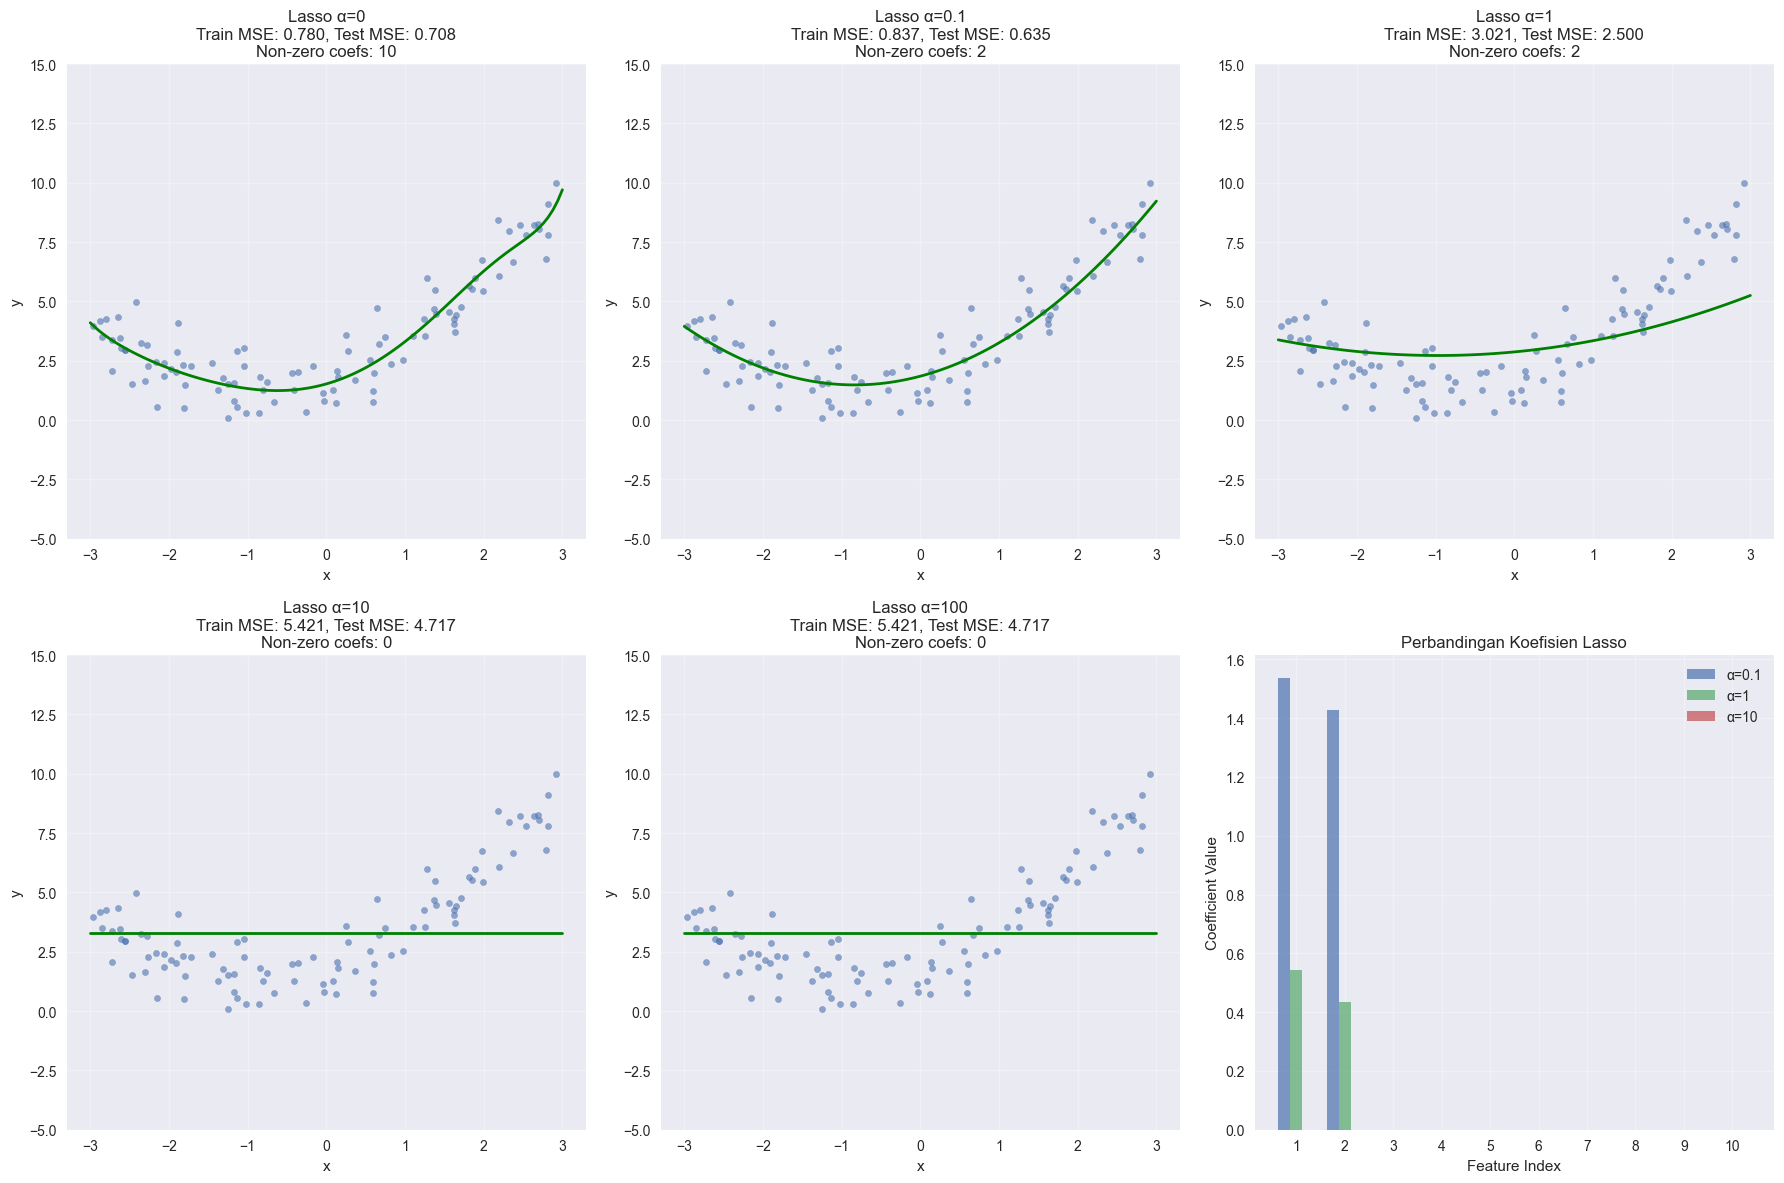

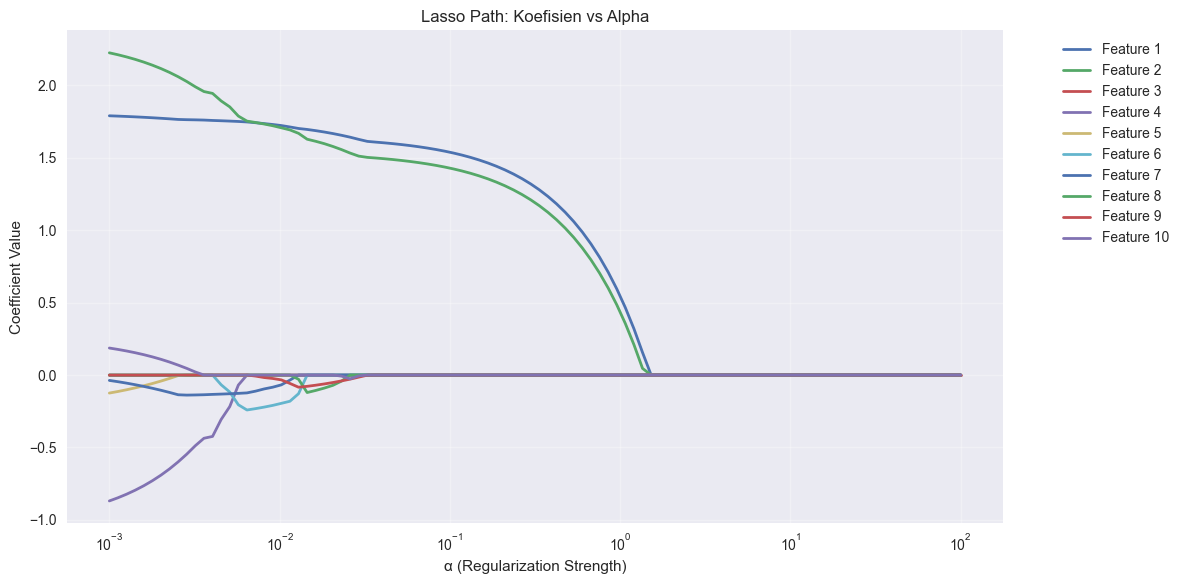

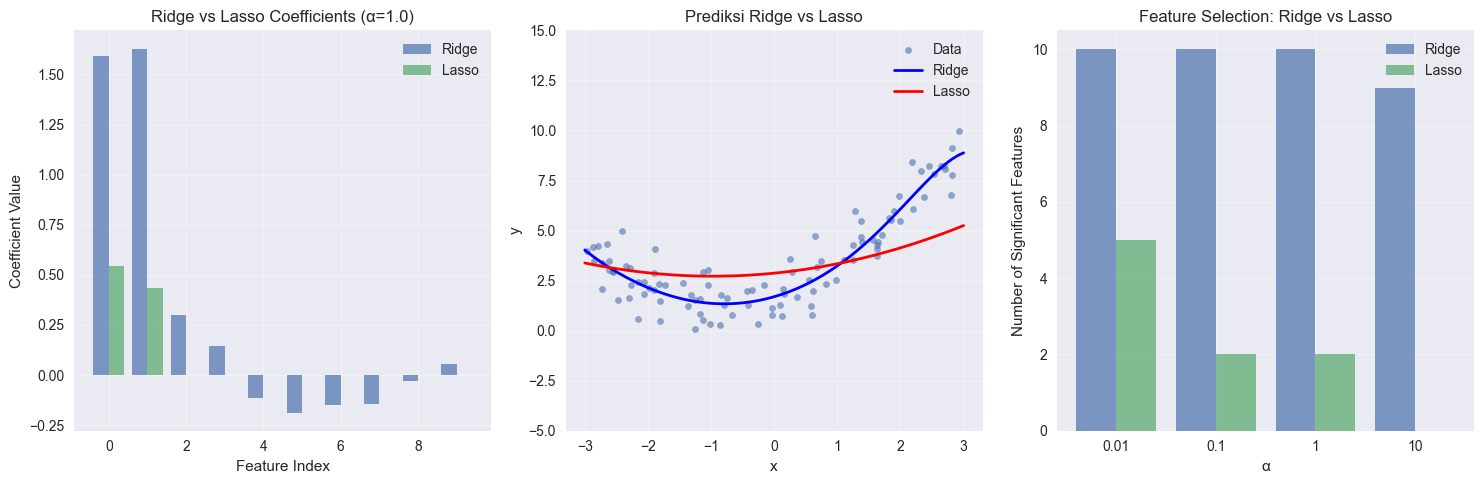

In [18]:
# Compare Lasso with different alpha values
lasso_models = {}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    # Train Lasso Regression
    lasso_reg = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_reg.fit(X_train_scaled, y_train)
    lasso_models[alpha] = lasso_reg
    
    # Predictions
    y_train_pred = lasso_reg.predict(X_train_scaled)
    y_test_pred = lasso_reg.predict(X_test_scaled)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Count non-zero coefficients
    non_zero_coefs = np.sum(np.abs(lasso_reg.coef_) > 1e-6)
    
    print(f"\nLasso α={alpha}:")
    print(f"  Training MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Non-zero coefficients: {non_zero_coefs}/{len(lasso_reg.coef_)}")
    print(f"  Coefficients L1 norm: {np.linalg.norm(lasso_reg.coef_, ord=1):.4f}")
    
    # Plot predictions
    X_plot_scaled = scaler.transform(X_plot_poly_reg)
    y_plot_pred = lasso_reg.predict(X_plot_scaled)
    
    axes[i].scatter(X_reg, y_reg, alpha=0.6, s=20)
    axes[i].plot(X_plot_reg, y_plot_pred, 'g-', linewidth=2)
    axes[i].set_title(f'Lasso α={alpha}\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}\nNon-zero coefs: {non_zero_coefs}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-5, 15)

# Plot coefficient comparison
# Use alphas that exist in the models
alpha_keys = [0.1, 1, 10]  # Skip alpha=0 as it may cause issues
width = 0.25
x_positions = range(len(lasso_models[0.1].coef_))

for i, alpha_key in enumerate(alpha_keys):
    x_offset = [x + i * width for x in x_positions]
    axes[5].bar(x_offset, lasso_models[alpha_key].coef_, width, alpha=0.7, label=f'α={alpha_key}')

axes[5].set_title('Perbandingan Koefisien Lasso')
axes[5].set_xlabel('Feature Index')
axes[5].set_ylabel('Coefficient Value')
axes[5].set_xticks([x + width for x in x_positions])
axes[5].set_xticklabels([f'{i+1}' for i in x_positions])
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Lasso path
lasso_path = Lasso(max_iter=10000)
coefs_lasso = []

for alpha in alphas_path:
    lasso_path.set_params(alpha=alpha)
    lasso_path.fit(X_train_scaled, y_train)
    coefs_lasso.append(lasso_path.coef_)

plt.figure(figsize=(12, 6))
coefs_lasso = np.array(coefs_lasso)
for i in range(coefs_lasso.shape[1]):
    plt.plot(alphas_path, coefs_lasso[:, i], linewidth=2, label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('α (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Path: Koefisien vs Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Compare Ridge vs Lasso directly
plt.figure(figsize=(15, 5))

# Coefficient values comparison
plt.subplot(1, 3, 1)
alpha_compare = 1.0
ridge_compare = Ridge(alpha=alpha_compare)
lasso_compare = Lasso(alpha=alpha_compare, max_iter=10000)

ridge_compare.fit(X_train_scaled, y_train)
lasso_compare.fit(X_train_scaled, y_train)

x_pos = np.arange(len(ridge_compare.coef_))
plt.bar(x_pos - 0.2, ridge_compare.coef_, 0.4, alpha=0.7, label='Ridge')
plt.bar(x_pos + 0.2, lasso_compare.coef_, 0.4, alpha=0.7, label='Lasso')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title(f'Ridge vs Lasso Coefficients (α={alpha_compare})')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction comparison
plt.subplot(1, 3, 2)
y_plot_ridge = ridge_compare.predict(X_plot_scaled)
y_plot_lasso = lasso_compare.predict(X_plot_scaled)

plt.scatter(X_reg, y_reg, alpha=0.6, s=20, label='Data')
plt.plot(X_plot_reg, y_plot_ridge, 'b-', linewidth=2, label='Ridge')
plt.plot(X_plot_reg, y_plot_lasso, 'r-', linewidth=2, label='Lasso')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi Ridge vs Lasso')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-5, 15)

# Feature selection visualization
plt.subplot(1, 3, 3)
alphas_selection = [0.01, 0.1, 1, 10]
n_features_ridge = []
n_features_lasso = []

for alpha in alphas_selection:
    ridge_temp = Ridge(alpha=alpha)
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    
    ridge_temp.fit(X_train_scaled, y_train)
    lasso_temp.fit(X_train_scaled, y_train)
    
    # Count significant coefficients (abs > 0.01)
    n_features_ridge.append(np.sum(np.abs(ridge_temp.coef_) > 0.01))
    n_features_lasso.append(np.sum(np.abs(lasso_temp.coef_) > 0.01))

x_pos = np.arange(len(alphas_selection))
plt.bar(x_pos - 0.2, n_features_ridge, 0.4, alpha=0.7, label='Ridge')
plt.bar(x_pos + 0.2, n_features_lasso, 0.4, alpha=0.7, label='Lasso')
plt.xlabel('α')
plt.ylabel('Number of Significant Features')
plt.title('Feature Selection: Ridge vs Lasso')
plt.xticks(x_pos, alphas_selection)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 6.3 ELASTIC NET

"""
ELASTIC NET:

Elastic Net menggabungkan Ridge dan Lasso regularization:
J(θ) = MSE(θ) + r×α×∑|θᵢ| + (1-r)×α×(½∑θᵢ²)

Di mana:
- r adalah l1_ratio (0 ≤ r ≤ 1)
- r = 0: Elastic Net = Ridge
- r = 1: Elastic Net = Lasso
- 0 < r < 1: kombinasi keduanya

Keuntungan Elastic Net:
- Menggabungkan keunggulan Ridge dan Lasso
- Lebih stabil dari Lasso ketika features berkorelasi tinggi
- Tetap bisa melakukan feature selection seperti Lasso
- Bekerja baik ketika jumlah features > jumlah samples
"""


Elastic Net l1_ratio=0:
  Training MSE: 1.5949
  Test MSE: 1.4767
  Non-zero coefficients: 10/10

Elastic Net l1_ratio=0.25:
  Training MSE: 1.7687
  Test MSE: 1.6101
  Non-zero coefficients: 10/10

Elastic Net l1_ratio=0.5:
  Training MSE: 2.0786
  Test MSE: 1.8063
  Non-zero coefficients: 7/10

Elastic Net l1_ratio=0.75:
  Training MSE: 2.5230
  Test MSE: 2.1120
  Non-zero coefficients: 4/10

Elastic Net l1_ratio=1.0:
  Training MSE: 3.0207
  Test MSE: 2.5004
  Non-zero coefficients: 2/10


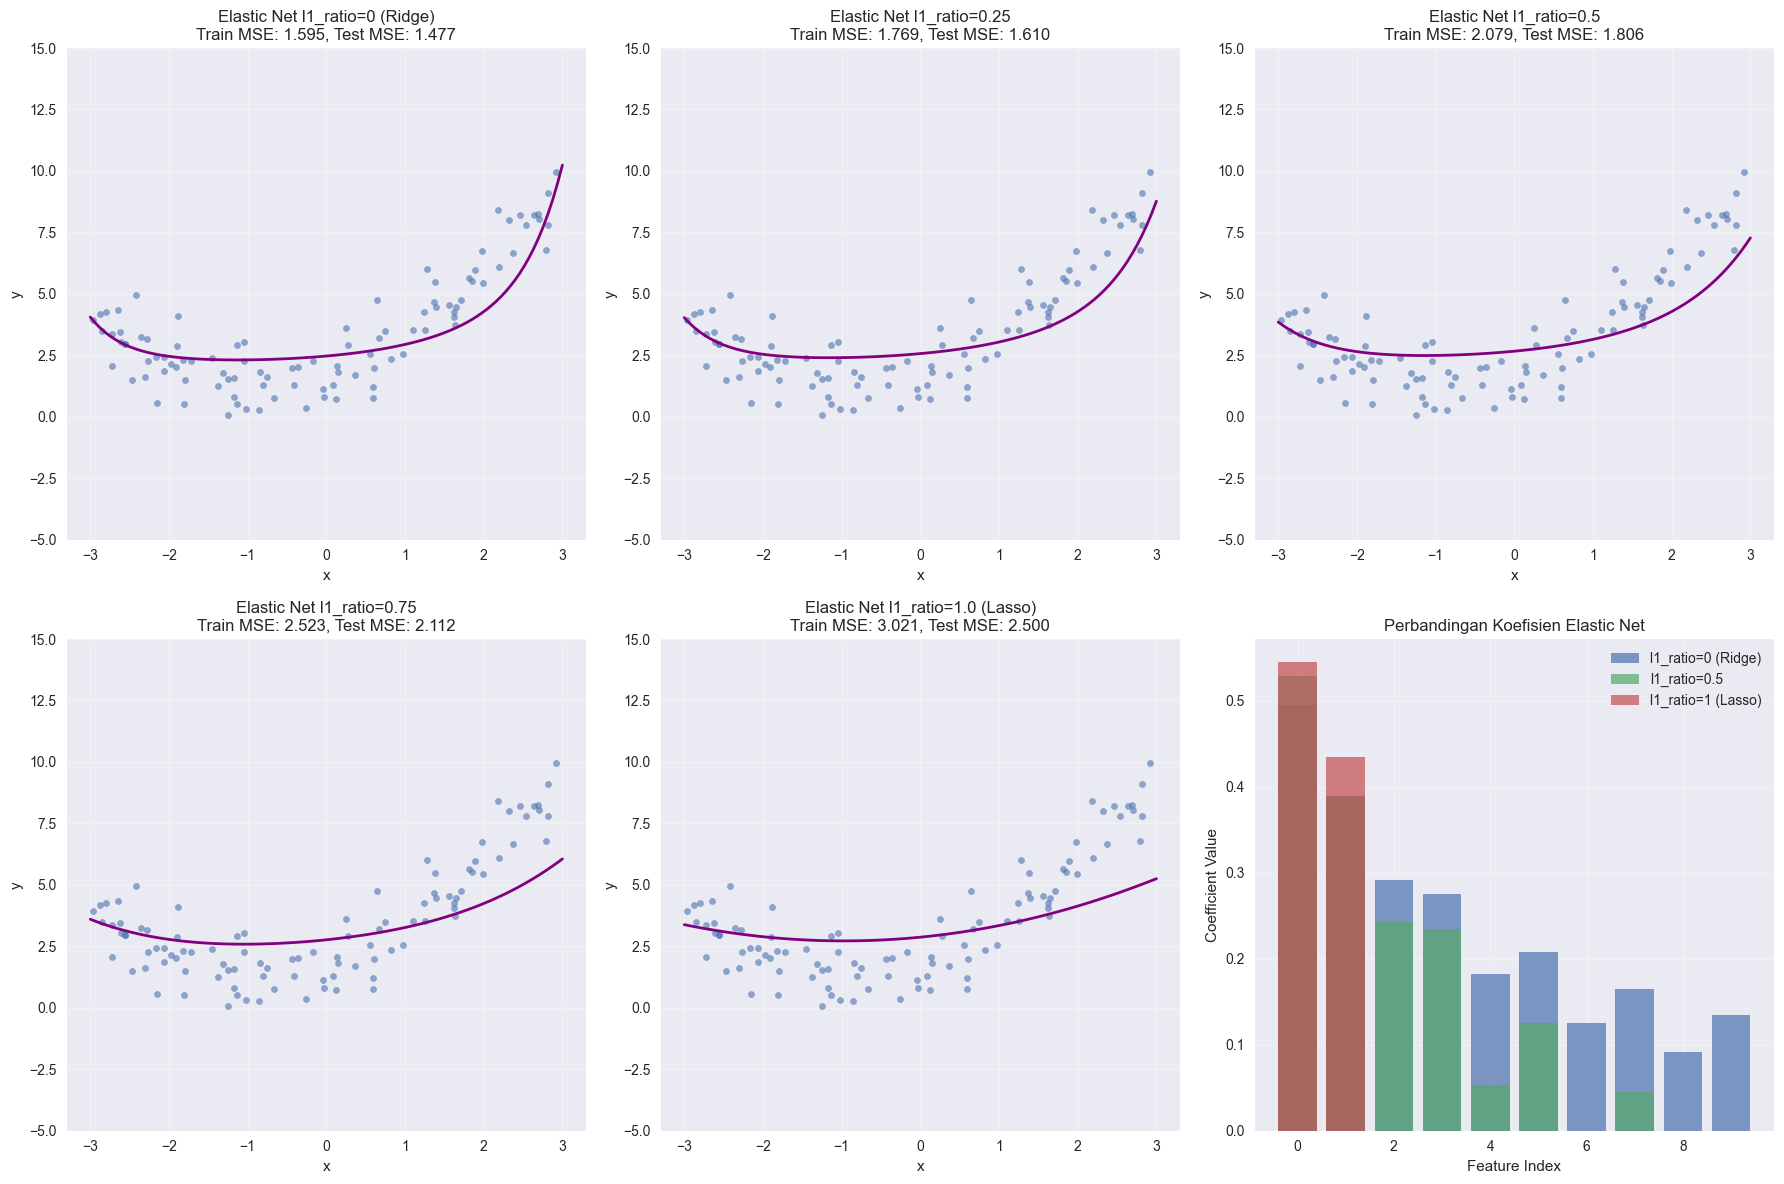


PERBANDINGAN REGULARIZATION METHODS
              Method  Train MSE  Test MSE  Non-zero Coefs  Coef Norm
0  Linear Regression     0.7704    0.6612              10    60.7347
1              Ridge     0.7968    0.6369              10     2.3213
2              Lasso     3.0207    2.5004               2     0.6969
3        Elastic Net     2.0786    1.8063               7     0.7512


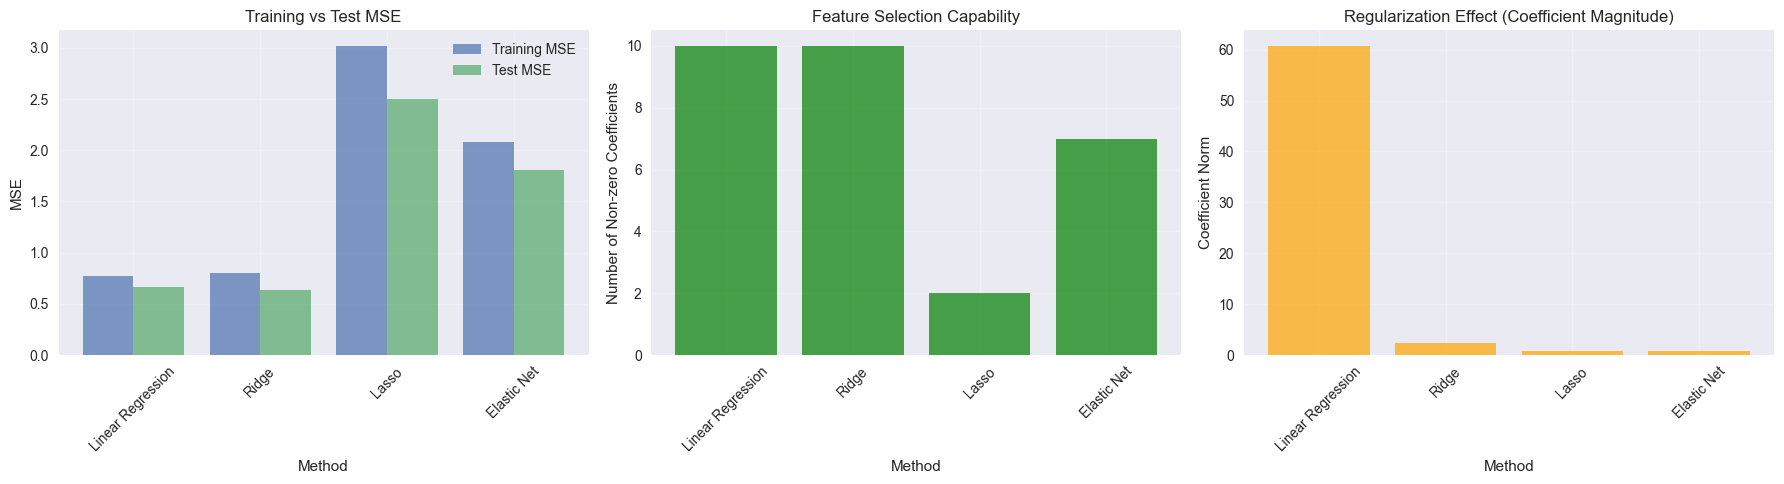

In [20]:
# Compare different l1_ratio values
l1_ratios = [0, 0.25, 0.5, 0.75, 1.0]
alpha_elastic = 1.0

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

elastic_models = {}

for i, l1_ratio in enumerate(l1_ratios):
    # Train Elastic Net
    elastic_reg = ElasticNet(alpha=alpha_elastic, l1_ratio=l1_ratio, 
                           random_state=42, max_iter=10000)
    elastic_reg.fit(X_train_scaled, y_train)
    elastic_models[l1_ratio] = elastic_reg
    
    # Predictions
    y_train_pred = elastic_reg.predict(X_train_scaled)
    y_test_pred = elastic_reg.predict(X_test_scaled)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    non_zero_coefs = np.sum(np.abs(elastic_reg.coef_) > 1e-6)
    
    print(f"\nElastic Net l1_ratio={l1_ratio}:")
    print(f"  Training MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Non-zero coefficients: {non_zero_coefs}/{len(elastic_reg.coef_)}")
    
    # Plot predictions
    y_plot_pred = elastic_reg.predict(X_plot_scaled)
    
    if i < 5:
        axes[i].scatter(X_reg, y_reg, alpha=0.6, s=20)
        axes[i].plot(X_plot_reg, y_plot_pred, 'purple', linewidth=2)
        if l1_ratio == 0:
            axes[i].set_title(f'Elastic Net l1_ratio={l1_ratio} (Ridge)\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}')
        elif l1_ratio == 1:
            axes[i].set_title(f'Elastic Net l1_ratio={l1_ratio} (Lasso)\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}')
        else:
            axes[i].set_title(f'Elastic Net l1_ratio={l1_ratio}\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}')
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_ylim(-5, 15)

# Plot coefficient comparison
axes[5].bar(range(len(elastic_models[0].coef_)), elastic_models[0].coef_, 
           alpha=0.7, label='l1_ratio=0 (Ridge)')
axes[5].bar(range(len(elastic_models[0.5].coef_)), elastic_models[0.5].coef_, 
           alpha=0.7, label='l1_ratio=0.5')
axes[5].bar(range(len(elastic_models[1.0].coef_)), elastic_models[1.0].coef_, 
           alpha=0.7, label='l1_ratio=1 (Lasso)')
axes[5].set_title('Perbandingan Koefisien Elastic Net')
axes[5].set_xlabel('Feature Index')
axes[5].set_ylabel('Coefficient Value')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary comparison of all regularization methods
print("\n" + "="*60)
print("PERBANDINGAN REGULARIZATION METHODS")
print("="*60)

methods = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']
alphas_compare = [0, 1, 1, 1]
l1_ratios_compare = [0, 0, 1, 0.5]

results = []
for method, alpha, l1_ratio in zip(methods, alphas_compare, l1_ratios_compare):
    if method == 'Linear Regression':
        model = LinearRegression()
    elif method == 'Ridge':
        model = Ridge(alpha=alpha)
    elif method == 'Lasso':
        model = Lasso(alpha=alpha, max_iter=10000)
    else:  # Elastic Net
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    if hasattr(model, 'coef_'):
        if method == 'Ridge':
            coef_norm = np.linalg.norm(model.coef_)
            non_zero = len(model.coef_)
        else:
            coef_norm = np.linalg.norm(model.coef_)
            non_zero = np.sum(np.abs(model.coef_) > 1e-6)
    else:
        coef_norm = 0
        non_zero = 0
    
    results.append([method, train_mse, test_mse, non_zero, coef_norm])

# Create comparison table
import pandas as pd
df_results = pd.DataFrame(results, columns=['Method', 'Train MSE', 'Test MSE', 'Non-zero Coefs', 'Coef Norm'])
print(df_results.round(4))

# Visualization of results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MSE comparison
x_pos = np.arange(len(methods))
axes[0].bar(x_pos - 0.2, df_results['Train MSE'], 0.4, alpha=0.7, label='Training MSE')
axes[0].bar(x_pos + 0.2, df_results['Test MSE'], 0.4, alpha=0.7, label='Test MSE')
axes[0].set_xlabel('Method')
axes[0].set_ylabel('MSE')
axes[0].set_title('Training vs Test MSE')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(methods, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Feature selection
axes[1].bar(methods, df_results['Non-zero Coefs'], alpha=0.7, color='green')
axes[1].set_xlabel('Method')
axes[1].set_ylabel('Number of Non-zero Coefficients')
axes[1].set_title('Feature Selection Capability')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Coefficient norm
axes[2].bar(methods, df_results['Coef Norm'], alpha=0.7, color='orange')
axes[2].set_xlabel('Method')
axes[2].set_ylabel('Coefficient Norm')
axes[2].set_title('Regularization Effect (Coefficient Magnitude)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. EARLY STOPPING

"""
TEORI EARLY STOPPING:

Early Stopping adalah teknik regularization yang bekerja dengan menghentikan
training ketika validation error mencapai minimum. Ini mencegah overfitting
tanpa mengubah arsitektur model atau menambah penalty term.

Cara Kerja:
1. Monitor validation error selama training
2. Simpan model terbaik (dengan validation error terendah)
3. Hentikan training ketika validation error mulai naik
4. Gunakan model terbaik yang tersimpan

Keuntungan Early Stopping:
- Sederhana dan efektif
- Tidak perlu tuning hyperparameter regularization
- Menghemat waktu training
- Disebut "beautiful free lunch" oleh Geoffrey Hinton

Parameter penting:
- Patience: berapa epoch menunggu sebelum stop
- Min delta: minimum improvement yang dianggap signifikan

Training dengan Early Stopping:
Epoch | Training MSE | Val MSE | Best Epoch
---------------------------------------------
    0 |   14.427287 | 17.351901 |          0
   50 |    1.372861 |  1.434386 |         50
  100 |    0.965435 |  0.719901 |        100
  150 |    0.875664 |  0.619579 |        150
  200 |    0.840591 |  0.603528 |        200
  250 |    0.825509 |  0.606492 |        208

Early stopping pada epoch 258
Best epoch: 208
Best validation error: 0.603359


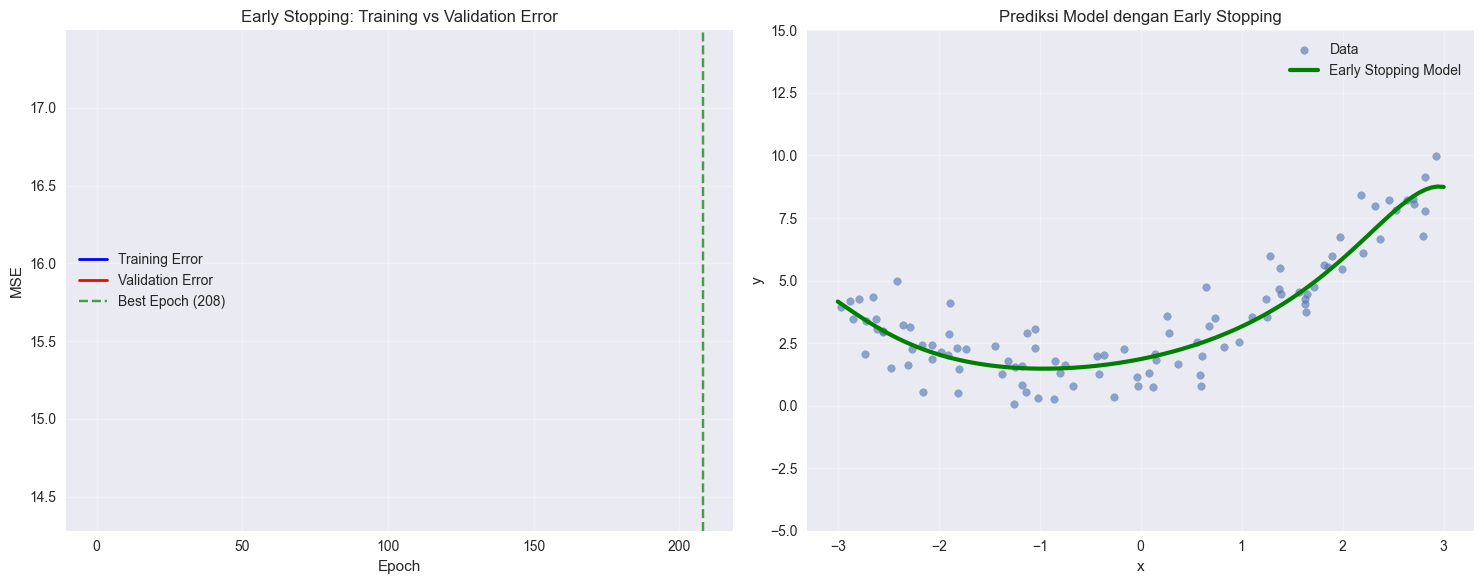

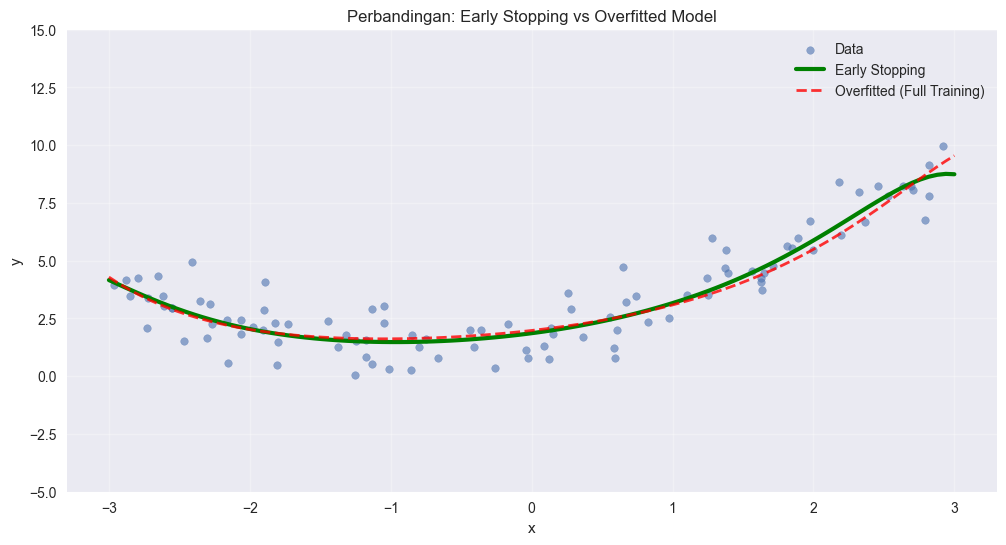


Perbandingan Performa:
Early Stopping - Validation MSE: 0.603359
Overfitted     - Validation MSE: 0.654968
Improvement: 7.88%


In [25]:
# Implementasi Early Stopping dengan SGDRegressor
from sklearn.base import clone
import copy

def early_stopping_training(X_train, X_val, y_train, y_val, max_epochs=1000, patience=50):
    """
    Implementasi Early Stopping manual dengan SGDRegressor
    """
    # Prepare polynomial features
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_val_scaled = scaler.transform(X_val_poly)
    
    # Initialize SGD model
    sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                          penalty=None, learning_rate="constant", eta0=0.0005,
                          random_state=42)
    
    # Initial fit to initialize the model
    sgd_reg.fit(X_train_scaled, y_train.ravel())
    
    train_errors = []
    val_errors = []
    best_val_error = float('inf')
    best_epoch = 0
    best_model = None
    epochs_without_improvement = 0
    
    print("Training dengan Early Stopping:")
    print("Epoch | Training MSE | Val MSE | Best Epoch")
    print("-" * 45)
    
    # Calculate initial errors
    y_train_pred = sgd_reg.predict(X_train_scaled)
    y_val_pred = sgd_reg.predict(X_val_scaled)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    best_val_error = val_error
    best_epoch = 0
    best_model = copy.deepcopy(sgd_reg)
    
    print(f"{0:5d} | {train_error:11.6f} | {val_error:9.6f} | {best_epoch:10d}")

    for epoch in range(1, max_epochs):
        # Train for one more epoch
        sgd_reg.fit(X_train_scaled, y_train.ravel())
        
        # Calculate errors
        y_train_pred = sgd_reg.predict(X_train_scaled)
        y_val_pred = sgd_reg.predict(X_val_scaled)
        
        train_error = mean_squared_error(y_train, y_train_pred)
        val_error = mean_squared_error(y_val, y_val_pred)
        # Check if this is the best model so far
        if val_error < best_val_error:
            best_val_error = val_error
            best_epoch = epoch
            best_model = copy.deepcopy(sgd_reg)
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Print progress
        if epoch % 50 == 0:
            print(f"{epoch:5d} | {train_error:11.6f} | {val_error:9.6f} | {best_epoch:10d}")
        
        # Early stopping check
        if epochs_without_improvement >= patience:
            print(f"\nEarly stopping pada epoch {epoch}")
            print(f"Best epoch: {best_epoch}")
            print(f"Best validation error: {best_val_error:.6f}")
            break
            break
            print(f"Best epoch: {best_epoch}")
            print(f"Best validation error: {best_val_error:.6f}")
            break
    
    return best_model, train_errors, val_errors, best_epoch, poly_features, scaler

# Split data untuk early stopping
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train dengan early stopping
best_model, train_errors, val_errors, best_epoch, poly_feat_es, scaler_es = early_stopping_training(
    X_train_es, X_val_es, y_train_es, y_val_es, max_epochs=1000, patience=50
)

# Visualisasi early stopping
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot training curves
epochs = range(len(train_errors))
axes[0].plot(epochs, train_errors, 'b-', linewidth=2, label='Training Error')
axes[0].plot(epochs, val_errors, 'r-', linewidth=2, label='Validation Error')
axes[0].axvline(x=best_epoch, color='g', linestyle='--', alpha=0.7, label=f'Best Epoch ({best_epoch})')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE')
axes[0].set_title('Early Stopping: Training vs Validation Error')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot predictions
X_plot_es = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly_es = poly_feat_es.transform(X_plot_es)
X_plot_scaled_es = scaler_es.transform(X_plot_poly_es)
y_plot_pred_es = best_model.predict(X_plot_scaled_es)

axes[1].scatter(X_reg, y_reg, alpha=0.6, s=30, label='Data')
axes[1].plot(X_plot_es, y_plot_pred_es, 'g-', linewidth=3, label='Early Stopping Model')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Prediksi Model dengan Early Stopping')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-5, 15)

plt.tight_layout()
plt.show()

# Compare dengan model tanpa early stopping (overfitted)
overfitted_model = SGDRegressor(max_iter=1000, penalty=None, learning_rate="constant", 
                               eta0=0.0005, random_state=42)

X_train_poly_full = poly_feat_es.transform(X_train_es)
X_train_scaled_full = scaler_es.transform(X_train_poly_full)
overfitted_model.fit(X_train_scaled_full, y_train_es.ravel())

y_plot_overfitted = overfitted_model.predict(X_plot_scaled_es)

plt.figure(figsize=(12, 6))
plt.scatter(X_reg, y_reg, alpha=0.6, s=30, label='Data')
plt.plot(X_plot_es, y_plot_pred_es, 'g-', linewidth=3, label='Early Stopping')
plt.plot(X_plot_es, y_plot_overfitted, 'r--', linewidth=2, alpha=0.8, label='Overfitted (Full Training)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perbandingan: Early Stopping vs Overfitted Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-5, 15)
plt.show()

# Metrics comparison
X_val_poly_full = poly_feat_es.transform(X_val_es)
X_val_scaled_full = scaler_es.transform(X_val_poly_full)

val_error_es = mean_squared_error(y_val_es, best_model.predict(X_val_scaled_full))
val_error_overfitted = mean_squared_error(y_val_es, overfitted_model.predict(X_val_scaled_full))

print(f"\nPerbandingan Performa:")
print(f"Early Stopping - Validation MSE: {val_error_es:.6f}")
print(f"Overfitted     - Validation MSE: {val_error_overfitted:.6f}")
print(f"Improvement: {((val_error_overfitted - val_error_es) / val_error_overfitted * 100):.2f}%")


## 8. LOGISTIC REGRESSION

"""
TEORI LOGISTIC REGRESSION:

Logistic Regression adalah algoritma klasifikasi yang menggunakan logistic function
(sigmoid) untuk memodelkan probabilitas bahwa suatu instance termasuk kelas tertentu.

Formula:
p = h_θ(x) = σ(θᵀx) = 1 / (1 + e^(-θᵀx))

Di mana:
- p adalah probabilitas prediksi untuk kelas positif
- σ adalah sigmoid function
- θᵀx adalah linear combination dari features

Decision Rule:
- Jika p ≥ 0.5: prediksi kelas 1 (positif)
- Jika p < 0.5: prediksi kelas 0 (negatif)

Cost Function (Log Loss):
J(θ) = -(1/m) × Σ[y log(p) + (1-y) log(1-p)]

Keuntungan Logistic Regression:
- Menghasilkan probabilitas, bukan hanya klasifikasi
- Tidak memerlukan asumsi distribusi data
- Relatif cepat dan simple
- Interpretable
- Tidak perlu feature scaling (tapi recommended)

Kerugian:
- Memerlukan linear relationship antara features dan log-odds
- Sensitive terhadap outliers
- Memerlukan large sample size untuk stable results
"""

Dataset: Iris classification
Feature: Petal width
Target: 1 if Iris-Virginica, 0 otherwise
Data shape: (150, 1)
Target distribution: [100  50]

Logistic Regression Parameters:
θ₀ (intercept): -7.1934
θ₁ (coefficient): 4.3325


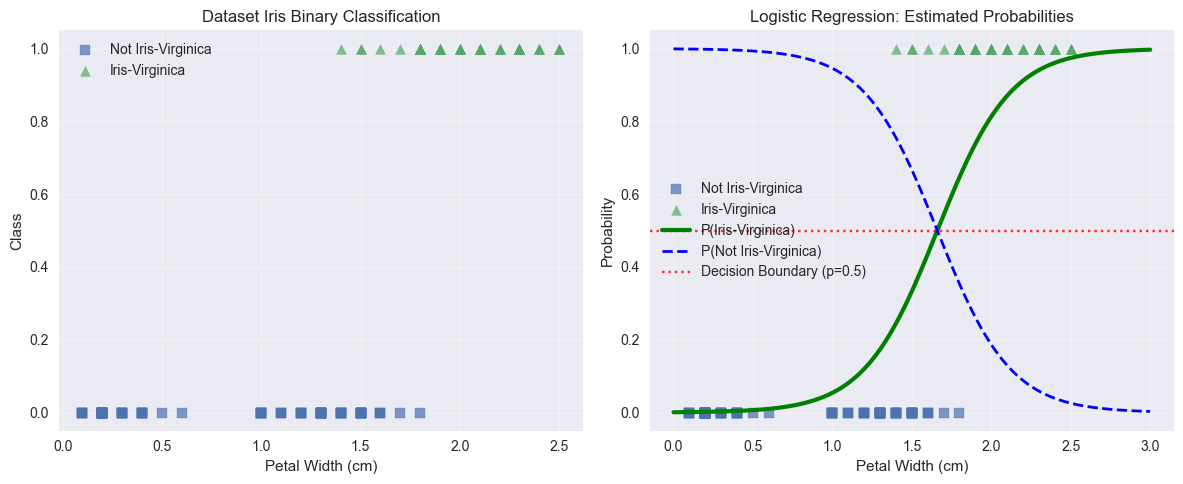

Decision boundary: 1.661 cm
Petal width 1.5 cm: P(Virginica)=0.333, Prediction=Not Virginica
Petal width 2.0 cm: P(Virginica)=0.813, Prediction=Virginica
Petal width 2.5 cm: P(Virginica)=0.974, Prediction=Virginica

8.1 MULTI-FEATURE LOGISTIC REGRESSION
---------------------------------------------

Multi-feature classification:
Features: ['Petal Length', 'Petal Width']
Data shape: (150, 2)

Parameters:
θ₀ (intercept): -17.5562
θ₁ (petal length): 2.7798
θ₂ (petal width): 2.3839


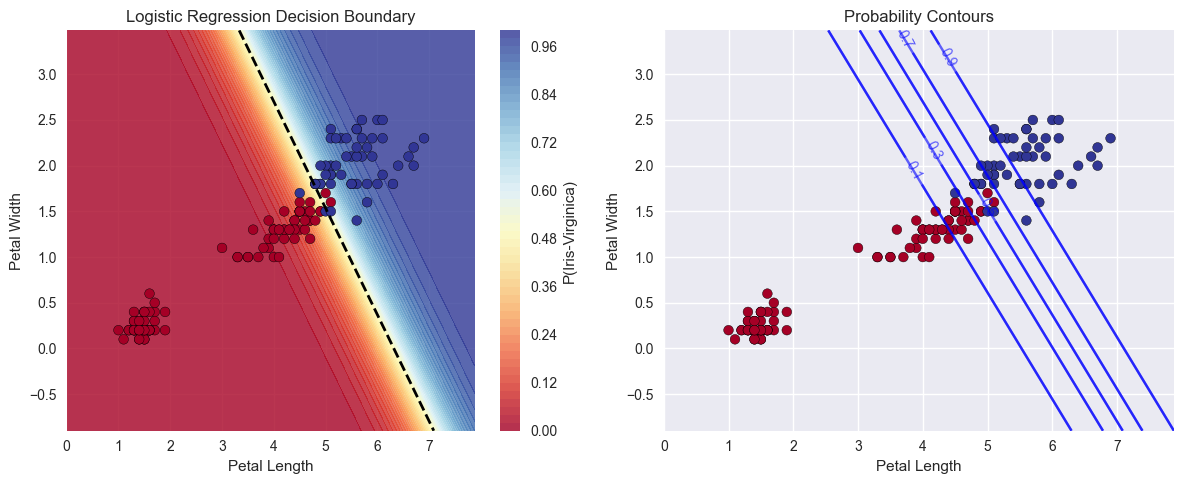


Model Performance:
Accuracy: 0.9667

Classification Report:
               precision    recall  f1-score   support

Not Virginica       0.98      0.97      0.97       100
    Virginica       0.94      0.96      0.95        50

     accuracy                           0.97       150
    macro avg       0.96      0.96      0.96       150
 weighted avg       0.97      0.97      0.97       150



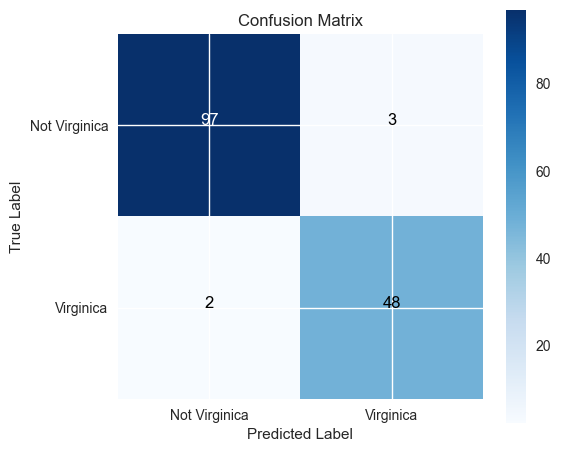

In [26]:
# Load iris dataset untuk binary classification
iris = datasets.load_iris()
X_iris = iris.data[:, 3:]  # petal width
y_iris = (iris.target == 2).astype(int)  # 1 if Iris-Virginica, else 0

print(f"Dataset: Iris classification")
print(f"Feature: Petal width")
print(f"Target: 1 if Iris-Virginica, 0 otherwise")
print(f"Data shape: {X_iris.shape}")
print(f"Target distribution: {np.bincount(y_iris)}")

# Visualize data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[y_iris==0], np.zeros(sum(y_iris==0)), alpha=0.7, marker='s', s=50, label='Not Iris-Virginica')
plt.scatter(X_iris[y_iris==1], np.ones(sum(y_iris==1)), alpha=0.7, marker='^', s=50, label='Iris-Virginica')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Class')
plt.title('Dataset Iris Binary Classification')
plt.legend()
plt.grid(True, alpha=0.3)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_iris, y_iris)

print(f"\nLogistic Regression Parameters:")
print(f"θ₀ (intercept): {log_reg.intercept_[0]:.4f}")
print(f"θ₁ (coefficient): {log_reg.coef_[0][0]:.4f}")

# Predictions and probabilities
X_test_range = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_test_range)
y_pred = log_reg.predict(X_test_range)

# Plot probabilities and decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X_iris[y_iris==0], np.zeros(sum(y_iris==0)), alpha=0.7, marker='s', s=50, label='Not Iris-Virginica')
plt.scatter(X_iris[y_iris==1], np.ones(sum(y_iris==1)), alpha=0.7, marker='^', s=50, label='Iris-Virginica')
plt.plot(X_test_range, y_proba[:, 1], 'g-', linewidth=3, label='P(Iris-Virginica)')
plt.plot(X_test_range, y_proba[:, 0], 'b--', linewidth=2, label='P(Not Iris-Virginica)')
plt.axhline(y=0.5, color='r', linestyle=':', alpha=0.8, label='Decision Boundary (p=0.5)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.title('Logistic Regression: Estimated Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find decision boundary
decision_boundary = X_test_range[np.argmin(np.abs(y_proba[:, 1] - 0.5))]
print(f"Decision boundary: {decision_boundary[0]:.3f} cm")

# Example predictions
test_samples = [[1.5], [2.0], [2.5]]
for sample in test_samples:
    prob = log_reg.predict_proba([sample])[0]
    pred = log_reg.predict([sample])[0]
    print(f"Petal width {sample[0]} cm: P(Virginica)={prob[1]:.3f}, Prediction={'Virginica' if pred else 'Not Virginica'}")

### 8.1 MULTI-FEATURE LOGISTIC REGRESSION

print("\n8.1 MULTI-FEATURE LOGISTIC REGRESSION")
print("-" * 45)

# Use petal length and width for 2D classification
X_iris_2d = iris.data[:, [2, 3]]  # petal length and width
feature_names = ['Petal Length', 'Petal Width']

print(f"\nMulti-feature classification:")
print(f"Features: {feature_names}")
print(f"Data shape: {X_iris_2d.shape}")

# Train logistic regression
log_reg_2d = LogisticRegression(random_state=42)
log_reg_2d.fit(X_iris_2d, y_iris)

print(f"\nParameters:")
print(f"θ₀ (intercept): {log_reg_2d.intercept_[0]:.4f}")
print(f"θ₁ (petal length): {log_reg_2d.coef_[0][0]:.4f}")
print(f"θ₂ (petal width): {log_reg_2d.coef_[0][1]:.4f}")

# Create decision boundary plot
def plot_decision_boundary(X, y, model, feature_names):
    """Plot decision boundary untuk 2D classification"""
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict_proba(mesh_points)[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Decision boundary
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='P(Iris-Virginica)')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Logistic Regression Decision Boundary')
    
    # Probability contours
    plt.subplot(1, 2, 2)
    contour_levels = [0.1, 0.3, 0.5, 0.7, 0.9]
    plt.contour(xx, yy, Z, levels=contour_levels, colors='blue', alpha=0.6)
    plt.clabel(plt.contour(xx, yy, Z, levels=contour_levels, colors='blue', alpha=0.6), 
              inline=True, fontsize=10)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Probability Contours')
    
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X_iris_2d, y_iris, log_reg_2d, feature_names)

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_2d = log_reg_2d.predict(X_iris_2d)
accuracy = accuracy_score(y_iris, y_pred_2d)

print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_iris, y_pred_2d, target_names=['Not Virginica', 'Virginica']))

# Confusion Matrix
cm = confusion_matrix(y_iris, y_pred_2d)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Not Virginica', 'Virginica']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## 9. SOFTMAX REGRESSION (MULTINOMIAL LOGISTIC REGRESSION)

print("\n9. SOFTMAX REGRESSION")
print("-" * 40)

"""
TEORI SOFTMAX REGRESSION:

Softmax Regression adalah generalisasi dari Logistic Regression untuk
multi-class classification. Algoritma ini dapat mengklasifikasi instance
ke dalam lebih dari 2 kelas secara langsung.

Formula:
Untuk setiap kelas k:
s_k(x) = θ_k^T × x

Softmax Function:
p_k = exp(s_k(x)) / Σ(exp(s_j(x))) untuk j=1 to K

Decision Rule:
ŷ = argmax_k(p_k) = argmax_k(s_k(x))

Cross-Entropy Cost Function:
J(Θ) = -(1/m) × ΣΣ y_k^(i) × log(p_k^(i))

Karakteristik:
- Setiap kelas memiliki parameter vector terpisah θ_k
- Semua probabilitas berjumlah 1: Σp_k = 1
- Menghasilkan probabilitas untuk setiap kelas
- Cocok untuk mutually exclusive classes

Perbedaan dengan One-vs-Rest:
- Softmax: satu model untuk semua kelas
- OvR: satu model binary untuk setiap kelas

Multi-class classification:
Features: Petal Length, Petal Width
Classes: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 2)
Class distribution: [50 50 50]

Softmax Regression Parameters:
Classes: [0 1 2]
Intercepts: [ 18.91470035   6.39571054 -25.31041089]
Coefficients shape: (3, 2)
setosa      : θ₀= 18.915, θ₁= -4.600, θ₂= -2.234
versicolor  : θ₀=  6.396, θ₁=  0.162, θ₂= -2.164
virginica   : θ₀=-25.310, θ₁=  4.438, θ₂=  4.398

Example predictions:
Sample [4.5, 1.5]:
  P(setosa      ) = 0.000
  P(versicolor  ) = 0.932
  P(virginica   ) = 0.068
  Prediction: versicolor

Sample [5.0, 2.0]:
  P(setosa      ) = 0.000
  P(versicolor  ) = 0.057
  P(virginica   ) = 0.943
  Prediction: virginica

Sample [6.0, 2.5]:
  P(setosa      ) = 0.000
  P(versicolor  ) = 0.000
  P(virginica   ) = 1.000
  Prediction: virginica



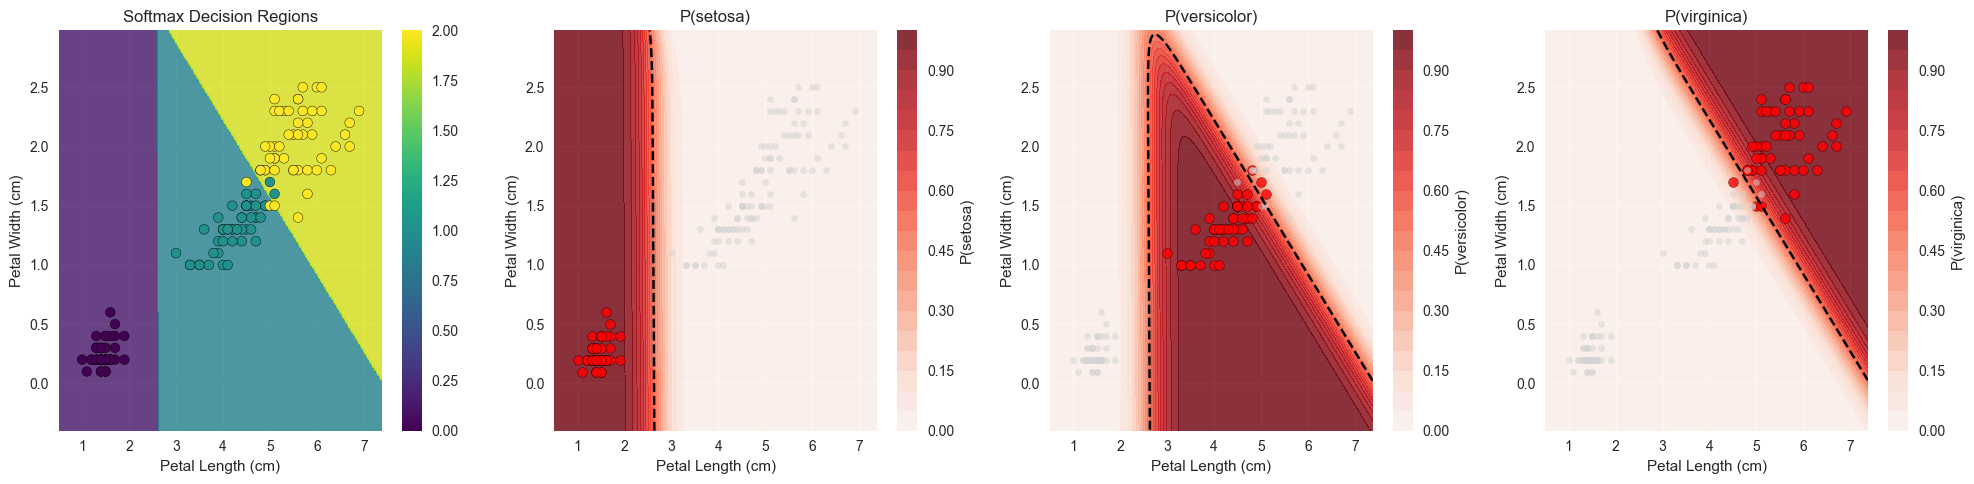


Softmax Regression Performance:
Accuracy: 0.9600

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



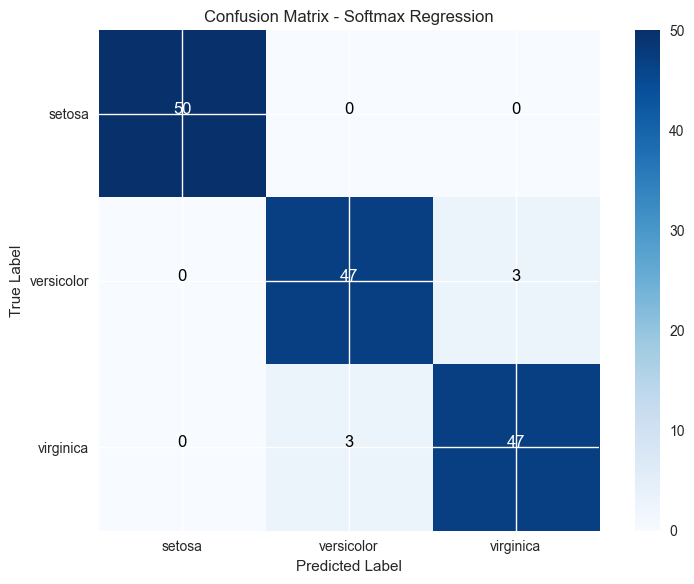


Comparison: One-vs-Rest vs Softmax
----------------------------------------
One-vs-Rest Accuracy: 0.9600
Softmax Accuracy:     0.9600


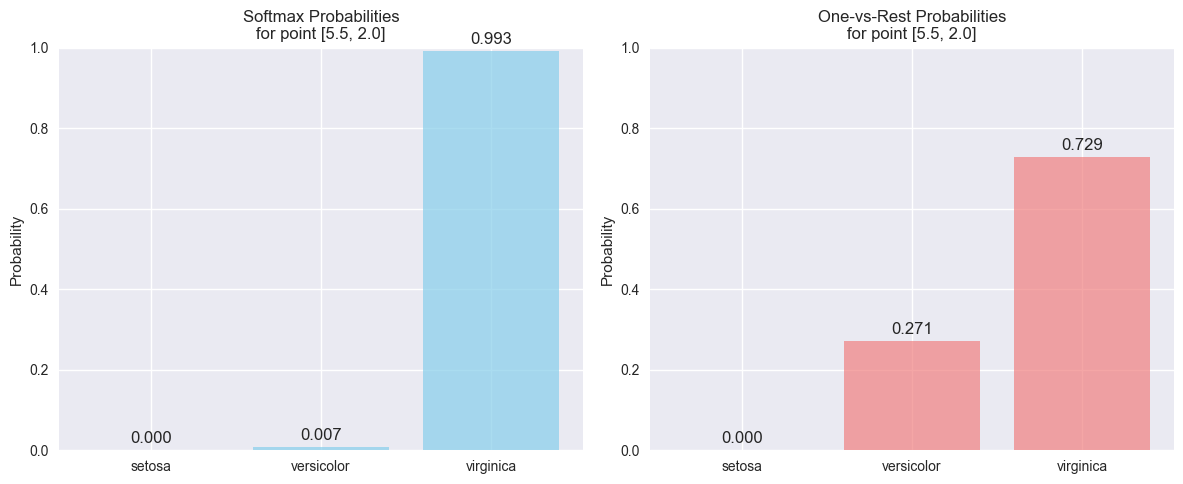


Probability comparison for point [5.5, 2.0]:
Class           Softmax    One-vs-Rest 
-------------------------------------
setosa          0.000      0.000       
versicolor      0.007      0.271       
virginica       0.993      0.729       

Sum of probabilities:
Softmax:     1.000
One-vs-Rest: 1.000


In [28]:
# Use full iris dataset (3 classes)
X_iris_full = iris.data[:, [2, 3]]  # petal length and width
y_iris_full = iris.target
class_names = iris.target_names

print(f"Multi-class classification:")
print(f"Features: Petal Length, Petal Width")
print(f"Classes: {class_names}")
print(f"Data shape: {X_iris_full.shape}")
print(f"Class distribution: {np.bincount(y_iris_full)}")

# Train Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", 
                                C=10, random_state=42)
softmax_reg.fit(X_iris_full, y_iris_full)

print(f"\nSoftmax Regression Parameters:")
print(f"Classes: {softmax_reg.classes_}")
print(f"Intercepts: {softmax_reg.intercept_}")
print(f"Coefficients shape: {softmax_reg.coef_.shape}")

for i, class_name in enumerate(class_names):
    print(f"{class_name:12s}: θ₀={softmax_reg.intercept_[i]:7.3f}, "
          f"θ₁={softmax_reg.coef_[i][0]:7.3f}, θ₂={softmax_reg.coef_[i][1]:7.3f}")

# Predictions and probabilities
print(f"\nExample predictions:")
test_samples = [[4.5, 1.5], [5.0, 2.0], [6.0, 2.5]]
for sample in test_samples:
    probas = softmax_reg.predict_proba([sample])[0]
    pred_class = softmax_reg.predict([sample])[0]
    pred_name = class_names[pred_class]
    
    print(f"Sample {sample}:")
    for j, class_name in enumerate(class_names):
        print(f"  P({class_name:12s}) = {probas[j]:.3f}")
    print(f"  Prediction: {pred_name}")
    print()

# Plot decision boundaries untuk 3 classes
def plot_softmax_decision_boundary(X, y, model, class_names):
    """Plot decision boundary untuk multi-class classification"""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(20, 5))
    
    # Decision regions
    plt.subplot(1, 4, 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Softmax Decision Regions')
    plt.colorbar(scatter)
    
    # Probability untuk setiap kelas
    for i, class_name in enumerate(class_names):
        plt.subplot(1, 4, i+2)
        Z_proba = model.predict_proba(mesh_points)[:, i]
        Z_proba = Z_proba.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z_proba, levels=20, alpha=0.8, cmap='Reds')
        plt.colorbar(label=f'P({class_name})')
        plt.contour(xx, yy, Z_proba, levels=[0.5], colors='black', linestyles='--')
        
        # Highlight relevant class
        mask = (y == i)
        plt.scatter(X[mask, 0], X[mask, 1], c='red', s=50, alpha=0.8, edgecolors='black')
        plt.scatter(X[~mask, 0], X[~mask, 1], c='lightgray', s=20, alpha=0.5)
        
        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Petal Width (cm)')
        plt.title(f'P({class_name})')
    
    plt.tight_layout()
    plt.show()

plot_softmax_decision_boundary(X_iris_full, y_iris_full, softmax_reg, class_names)

# Model evaluation
y_pred_softmax = softmax_reg.predict(X_iris_full)
accuracy_softmax = accuracy_score(y_iris_full, y_pred_softmax)

print(f"\nSoftmax Regression Performance:")
print(f"Accuracy: {accuracy_softmax:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_iris_full, y_pred_softmax, target_names=class_names))

# Confusion Matrix untuk multi-class
cm_softmax = confusion_matrix(y_iris_full, y_pred_softmax)

plt.figure(figsize=(8, 6))
plt.imshow(cm_softmax, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Softmax Regression')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

thresh = cm_softmax.max() / 2.
for i, j in np.ndindex(cm_softmax.shape):
    plt.text(j, i, format(cm_softmax[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_softmax[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Compare One-vs-Rest dengan Softmax
print("\nComparison: One-vs-Rest vs Softmax")
print("-" * 40)

# One-vs-Rest
ovr_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", 
                            C=10, random_state=42)
ovr_reg.fit(X_iris_full, y_iris_full)
y_pred_ovr = ovr_reg.predict(X_iris_full)
accuracy_ovr = accuracy_score(y_iris_full, y_pred_ovr)

print(f"One-vs-Rest Accuracy: {accuracy_ovr:.4f}")
print(f"Softmax Accuracy:     {accuracy_softmax:.4f}")

# Visualize probabilities comparison
test_point = [5.5, 2.0]
proba_softmax = softmax_reg.predict_proba([test_point])[0]
proba_ovr = ovr_reg.predict_proba([test_point])[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Softmax probabilities
ax1.bar(class_names, proba_softmax, alpha=0.7, color='skyblue')
ax1.set_title(f'Softmax Probabilities\nfor point {test_point}')
ax1.set_ylabel('Probability')
ax1.set_ylim(0, 1)
for i, prob in enumerate(proba_softmax):
    ax1.text(i, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom')

# One-vs-Rest probabilities
ax2.bar(class_names, proba_ovr, alpha=0.7, color='lightcoral')
ax2.set_title(f'One-vs-Rest Probabilities\nfor point {test_point}')
ax2.set_ylabel('Probability')
ax2.set_ylim(0, 1)
for i, prob in enumerate(proba_ovr):
    ax2.text(i, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nProbability comparison for point {test_point}:")
print(f"{'Class':<15} {'Softmax':<10} {'One-vs-Rest':<12}")
print("-" * 37)
for i, class_name in enumerate(class_names):
    print(f"{class_name:<15} {proba_softmax[i]:<10.3f} {proba_ovr[i]:<12.3f}")

print(f"\nSum of probabilities:")
print(f"Softmax:     {np.sum(proba_softmax):.3f}")
print(f"One-vs-Rest: {np.sum(proba_ovr):.3f}")

In [ ]:
print("\n" + "="*60)
print("RINGKASAN CHAPTER 4 - PART 2")
print("="*60)
print("""
Dalam bagian kedua Chapter 4 ini, kita telah mempelajari:

6. REGULARIZED LINEAR MODELS:
   - Ridge (L2): menyusutkan koefisien, tidak pernah tepat nol
   - Lasso (L1): dapat membuat koefisien tepat nol (feature selection)
   - Elastic Net: kombinasi Ridge dan Lasso
   - Pentingnya feature scaling untuk regularization

7. EARLY STOPPING:
   - Teknik regularization dengan menghentikan training di waktu optimal
   - Monitor validation error, stop ketika mulai naik
   - "Beautiful free lunch" - simple tapi efektif

8. LOGISTIC REGRESSION:
   - Classification algorithm menggunakan sigmoid function
   - Menghasilkan probabilitas, bukan hanya prediksi kelas
   - Linear decision boundary
   - Cost function: log loss (cross-entropy)

9. SOFTMAX REGRESSION:
   - Generalisasi Logistic Regression untuk multi-class
   - Setiap kelas memiliki parameter vector terpisah
   - Probabilitas semua kelas berjumlah 1
   - Cocok untuk mutually exclusive classes

KEY INSIGHTS:
- Regularization mencegah overfitting dengan membatasi complexity model
- Feature scaling sangat penting untuk regularized models
- Lasso melakukan automatic feature selection
- Early stopping adalah regularization technique yang simple tapi powerful
- Logistic Regression menghasilkan probabilitas yang interpretable
- Softmax lebih consistent dibanding One-vs-Rest untuk multi-class

GUIDELINES:
- Gunakan Ridge sebagai default regularization
- Gunakan Lasso jika ingin feature selection
- Gunakan Elastic Net jika ada korelasi tinggi antar features
- Selalu lakukan feature scaling untuk regularized models
- Monitor learning curves untuk detect overfitting/underfitting
""")

print("\n" + "="*60)
print("CHAPTER 4 COMPLETED SUCCESSFULLY!")
print("="*60)


RINGKASAN CHAPTER 4 - PART 2

Dalam bagian kedua Chapter 4 ini, kita telah mempelajari:

6. REGULARIZED LINEAR MODELS:
   - Ridge (L2): menyusutkan koefisien, tidak pernah tepat nol
   - Lasso (L1): dapat membuat koefisien tepat nol (feature selection)
   - Elastic Net: kombinasi Ridge dan Lasso
   - Pentingnya feature scaling untuk regularization

7. EARLY STOPPING:
   - Teknik regularization dengan menghentikan training di waktu optimal
   - Monitor validation error, stop ketika mulai naik
   - "Beautiful free lunch" - simple tapi efektif

8. LOGISTIC REGRESSION:
   - Classification algorithm menggunakan sigmoid function
   - Menghasilkan probabilitas, bukan hanya prediksi kelas
   - Linear decision boundary
   - Cost function: log loss (cross-entropy)

9. SOFTMAX REGRESSION:
   - Generalisasi Logistic Regression untuk multi-class
   - Setiap kelas memiliki parameter vector terpisah
   - Probabilitas semua kelas berjumlah 1
   - Cocok untuk mutually exclusive classes

KEY INSIGHTS:
